---
>「中道とは『偏らないこころ』です。仏教の真髄はなにかと問われたら、わたしは迷わずこの『中道のこころ』と答えます。東洋的には『中庸』と表現します」（中村元『いい加減に生きる』）
---

# 機械学習ライブラリの基礎

代表的な機械学習アルゴリズムの基本として、**単回帰分析**と**重回帰分析**について、さらにより実践的な手法として**SVM**と**ランダムフォレスト**、さらに**LightGBM**について学ぶ

## 基本の基本

何をしようとしているのかを理解する
- sklearnでは、Lossは明示されないことが多いが、PyTorchでは必須

<img src="http://class.west.sd.keio.ac.jp/dataai/text/traintest.png" width="70%">


## 単回帰分析

単回帰分析は、機械学習アルゴリズムの中でも最も基礎的な手法のひとつで、ひとつの入力変数からひとつの出力変数を予測する手法である

機械学習アルゴリズムは**教師あり学習**と**教師なし学習**に大別されるが、単回帰分析は教師あり学習に分類される

教師あり学習の典型的問題として、$10$や$0.1$のように数値（連続値）を予測する**回帰**と、赤ワインか白ワインを分けるようなカテゴリ値を予測する**分類**がある

### 単回帰分析の問題例

例として、家賃予測問題、すなわち **出力変数**もしくは**目的変数** $y$として家賃を予測する問題を扱うとき、**入力変数**もしくは**説明変数** $x$は何が想定されるであろうか？

具体例として、家賃の予測に必要な情報、例えば、部屋の広さ、駅からの距離、犯罪発生率などが思い浮かぶが、ここでは部屋の広さを入力変数 $x$ として採用する

もちろん、部屋の広さだけは決定せず、複数の入力変数を扱うモデル化の方が一般的であるが、複数用いる例は重回帰分析として扱う

機械学習のアルゴリズムは、どの手法も大きく分けて次の3ステップ処理が進む

1. モデルの決定
2. 目的関数の決定
3. 最適なパラメータの決定

### Step1. モデルの決定（単回帰分析）

まず**モデル**を決定する
- モデルとは、出力変数 $y$ と入力変数 $x$ の関係を**定式化**した表現手段であり、一般的には人手で設計を行うが、機械学習では、文字通り機械が定式化を行う

例えば、家賃と部屋の広さの関係が次のようなデータセットが与えられたとする

<img src="http://class.west.sd.keio.ac.jp/dataai/text/2-01.png" width="20%">


部屋が広いほど家賃が高くなる比例関係があるため、直線を予測に用いるのが妥当であろう

<img src="http://class.west.sd.keio.ac.jp/dataai/text/2-02.png" width="20%">

そこで直線をモデルとして採用し、特に機械学習では、傾きを**重み (weight)** $w$、 切片を**バイアス (bias)** $b$ と表現することから、モデルを以下のように定式化する

$$
y = wx + b
$$

単回帰分析を行うということは、これら重み$w$とバイアス$b$をデータにうまくフィットするように調整することを意味し、機械学習の多くは、このようなパラメータで特徴付けられたモデルを使い、与えられた**データセット**に適合するようにパラメータを求めることが目標となる
- ここでデータセットは、**入力変数**である部屋の広さ $x$ と**教師データ**となる家賃 $t$ の組からなるデータの集合であり、予測値を $y$として教師データ$t$との差や一致度を議論する
- このデータセットを一般に$\mathcal{D} = \{x_n, t_n\}_{n=1}^{N}$ として表す
- $n$ ($n=1,2,\ldots,N$) は $n$ 番目の物件を、$N$ は**サンプル数**であり全物件数を表す

このデータに対し、最初に**データの中心化**処理を施す\
これは、**平均を** $\boldsymbol{0}$として中央に移動する変換であり、広く一般的に前処理として行われ、さらにスケーリングも行われることが多い

<img src="http://class.west.sd.keio.ac.jp/dataai/text/2-03.png" width="40%">

この処理によりバイアス $b$を$0$とすることができ、$y_{c} = wx_{c}$とシンプルに表現できるため、推定が容易となる

<img src="http://class.west.sd.keio.ac.jp/dataai/text/2-04.png" width="40%">

データの中心化を行うには、入出力の平均をデータの全体から引けばよい

$$
\begin{aligned}
x_{c} &= x - \bar{x} \\
t_{c} &= t - \bar{t}
\end{aligned}
$$

中心化後を示す添え字 $c$ について以後省略するとモデルは次の通り
$$
y = wx
$$

つまり、単回帰分析の目標はデータセット $\mathcal{D} = \{x_n, t_n\}_{n=1}^{N}$ に基づいてパラメータ $w$ を**適切**に調整することである

### Step2. 目的関数の決定（単回帰分析）

一般に教師あり学習では、**目的関数**(**評価関数**さらには**コスト関数**や**誤差関数**とも呼ばれる)を設計しその目的関数を最小化(または最大化)することでモデルの学習を行う
- 教師データと予測値の二乗誤差は、完全一致つまり誤差が$0$のとき$t = y$となり、誤差が大きくなるにしがたい値が大きくなることから目的関数として広く用いられる

既に述べた通りであるが、$n$ 番目の物件に対する教師データ$t_{n}$ と予測値$y_{n}$の二乗誤差は
$$
(t_{n} - y_{n})^{2}
$$
であり、全物件について考慮するため、
$$
\mathcal{L}=\sum^{N}_{n=1}\left( t_{n}-y_{n}\right)^{2}\\
$$
を考える

Step1で決めたモデル$y_{n} = wx_{n}$を代入すると、目的関数は
$$
\mathcal{L}=\sum^{N}_{n=1}\left( t_{n}-wx_{n}\right)^{2}
$$
となり、これを**損失関数(loss function)**と呼ぶ

### Step3. 最適なパラメータの決定（単回帰分析）

目的関数を最小化するパラメータを微分して求める
$$
\begin{aligned}
\dfrac{\partial }{\partial w} \mathcal{L}  &= \dfrac{\partial}{\partial w} { \sum^{N}_{n=1} ( t_{n}-wx_{n})^{2} }=\sum^{N}_{n=1}\dfrac {\partial }{\partial w}\left( t_{n}-wx_{n}\right)^{2}
\\&=-\sum^{N}_{n=1}2x_{n}\left( t_{n}-wx_{n}\right)
\end{aligned}
$$
この微分値が0となるように$w$を求めると、
$$
-2\sum^{N}_{n=1}x_{n}\left( t_{n}-wx_{n}\right)=
-2\sum^{N}_{n=1}x_{n}t_{n}+2w\sum^{N}_{n=1}x^{2}_{n}=0\\
\therefore
w=\dfrac {\displaystyle  \sum^{N}_{n=1}x_{n}t_{n}}{\displaystyle  \sum^{N}_{n=1}x^{2}_{n}}
$$
となり、パラメータ $w$ が与えられたデータセット $\mathcal{D} = \{x_n, t_n\}_{n=1}^{N}$ のみで決定できる

実際に、家賃と部屋の広さの例を用いてパラメータ $w$ を求めると、
$$
\begin{aligned}
\bar{x} &= \dfrac{1}{3} (1 + 2 + 3) = 2 \\
\bar{t} &= \dfrac{1}{3}(2 + 3.9 + 6.1) = 4
\end{aligned}
$$

従って、中心化処理を施すと、

$$
\begin{aligned}
x_{1} &= 1 - 2 = -1 \\
x_{2} &= 2 -2 = 0 \\
x_{3} &= 3- 2 = 1\\
t_{1} &= 2 - 4 = -2\\
t_{2} &= 3.9 - 4 = -0.1\\
t_{3} &= 6.1 - 4 = 2.1
\end{aligned}
$$

となる

中心化後の値を用いて，最適なパラメータ$w$を求めると、

$$
\begin{aligned}
w &= \dfrac{\displaystyle \sum_{n=1}^{N}x_{n}t_{n}}{\displaystyle  \sum_{n=1}^{N}x_{n}^{2}}
= \dfrac{x_{1}t_{1} + x_{2}t_{2} + x_{3}t_{3}}{x_{1}^{2} + x_{2}^{2} + x_{3}^{2}} \\
&= \dfrac{-1 \times (-2) + 0 \times 0.1 + 1 \times 2.1}{(-1)^{2} + 0^2 + 1^2} \\
&= 2.05
\end{aligned}
$$
となり、このパラメータを使用したモデルを**学習済みモデル**と呼ぶ

このモデルを使って新しいサンプルに対する予測を行う
- 学習済みモデルを用い、新たな入力データの予測値を得ることを**推論**と呼ぶ

新しいサンプル $x_{q}=1.5$ に対する予測値は、
$$
\begin{aligned}
y_{c} &= wx_{c} \\
y_{q} - \bar{t} &= w(x_{q}-\bar{x}) \\
\Rightarrow y_{q} &= w(x_{q}-\bar{x}) + \bar{t} \\
&= 2.05 \times (1.5 - 2) + 4 \\
&= 2.975
\end{aligned}
$$
実際の予測値は中心化したデータを元に戻して得る必要がある

## 重回帰分析

重回帰分析は単回帰分析と同様に教師あり学習に分類され、複数の入力変数から出力変数を予測する機械学習アルゴリズムである

### 重回帰分析の問題例

単回帰分析の例を拡張し、駅からの距離や犯罪発生率なども考慮して重回帰解析を行う
- 例えば、部屋の広さ $x_{1}$, 駅からの距離 $x_{2}$, ..., 犯罪発生率 $x_{M}$ のように $M$ 個の入力変数を想定する

単回帰分析と同様のステップで処理を進める

### Step1. モデルの決定（重回帰分析）

重回帰分析では、単回帰解析の式を複数の入力変数へと拡張し、
$$
y=w_{1}x_{1}+w_{2}x_{2}+\ldots +w_{M}x_{M}+b
$$
という**線形結合**の形で表現するとする\
各入力変数は線形に出力変数に影響を与える前提であるため、単純なモデル化である

この場合の重回帰分析のモデルは、
$$
y = \sum_{m=1}^{M} w_{m} x_{m} + b
$$
と記述でき、$x_0 = 1$、$w_0 = b$とすれば、$m=0$も想定できる

$$
y=w_{0}x_{0}+w_{1}x_{1}+\ldots +w_{M}x_{M}
$$
この式はベクトルの内積を意味し、$x\times w$の形にすると、
$$
\begin{aligned}
y&=w_{0}x_{0}+w_{1}x_{1}+\ldots +w_{M}x_{M}\\
&=\begin{bmatrix}
x_{0} & x_{1} & \ldots  & x_{M}
\end{bmatrix}\begin{bmatrix}
w_{0} \\
w_{1} \\
\vdots  \\
w_{M}
\end{bmatrix}
=\boldsymbol{x}^{T}\boldsymbol{w}
\end{aligned}
$$
となり、この式が重回帰分析のモデルである\
今回はパラメータとして $M+1$ 個の重み $\boldsymbol{w}$ を求めればよい

### Step2. 目的関数の決定（重回帰分析）

重回帰分析においても予測値$y$を求めるという点では同じで、次の目的関数を利用する
$$
\begin{aligned}
\mathcal{L}&=\left( t_{1}-y_{1}\right)^{2}+\left( t_{2}-y_{2}\right)^{2}+\ldots + \left( t_{N}-y_{N}\right)^{2}
\end{aligned}
$$
これを$\sum$ではなく、ベクトルを用いて記述すると、
$$
\begin{aligned}
\mathcal{L}&=\begin{bmatrix} t_{1} - y_{1} & t_{2}-y_{2} & \ldots & t_{N}-y_{N} \end{bmatrix} \begin{bmatrix}
t_{1}-y_{1} \\
t_{2}-y_{2} \\
\vdots \\
t_{N}-y_{N}
\end{bmatrix}\\
&=\left( \boldsymbol{t}-\boldsymbol{y}\right)^{T}\left( \boldsymbol{t}-\boldsymbol{y}\right)
\end{aligned}
$$
となる

$$
y=w_{0}x_{0}+w_{1}x_{1}+\ldots +w_{M}x_{M}
$$
より、これを全ての$\boldsymbol{y}$に拡張して、
$$
\begin{aligned}
\boldsymbol{y}&=
\begin{bmatrix}
x_{10} & x_{11} & x_{12} & \ldots  & x_{1M} \\
x_{20} & x_{21} & x_{22} & \ldots  & x_{2M} \\
\vdots  & \vdots  & \vdots  & \ddots  \\
x_{N0} & x_{N1} & x_{N{2}} & \ldots  & x_{NM}
\end{bmatrix}\begin{bmatrix}
w_{0} \\
w_{1} \\
w_{2} \\
\vdots  \\
w_{M}
\end{bmatrix}\\
&=\boldsymbol{X}\boldsymbol{w}
\end{aligned}
$$
と表記できる

行がサンプルで例えば各物件に対応し、列が入力変数で例えば部屋の広さや駅からの距離などに対応する

具体的に考えると、部屋の広さ $= 50m^{2}$ 、駅からの距離 $= 600 m$ 、犯罪発生率 $= 2$% のような $n$ 番目の物件の場合、入力変数の数$M=3$とし、
$$
\boldsymbol{x}_{n}^{T} = \begin{bmatrix}
1 & 50 & 600 & 0.02
\end{bmatrix}
$$
のようにデータを行方向に格納する
- なお、先頭の $1$ はバイアスを包含する際に使用する $x_{0}$ を意味する

### Step3. パラメータを最適化する（重回帰分析）

目的関数を最小化するモデルのパラメータ$\boldsymbol{w}$を次のように求める

目的関数は、
$$
\begin{aligned}
\mathcal{L}&=\left( \boldsymbol{t}-\boldsymbol{y}\right)^{T}\left( \boldsymbol{t}-\boldsymbol{y}\right) \\
&=\left( \boldsymbol{t}-\boldsymbol{X}\boldsymbol{w}\right)^{T}\left( \boldsymbol{t}-\boldsymbol{X}\boldsymbol{w}\right) \\
&= \left\{ \boldsymbol{t}^{T}-(\boldsymbol{X}\boldsymbol{w})^{T}\right\}\left( \boldsymbol{t}-\boldsymbol{X}\boldsymbol{w}\right) \\
&=\left( \boldsymbol{t}^{T}-\boldsymbol{w}^{T}\boldsymbol{X}^{T}\right)\left( \boldsymbol{t}-\boldsymbol{X}\boldsymbol{w}\right) \because (\boldsymbol{A}\boldsymbol{B})^{T} = \boldsymbol{B}^{T}\boldsymbol{A}^{T}\\
&=\boldsymbol{t}^{T}\boldsymbol{t}-\boldsymbol{t}^{T}\boldsymbol{X}\boldsymbol{w}-\boldsymbol{w}^{T}\boldsymbol{X}^{T}\boldsymbol{t} + \boldsymbol{w}^{T}\boldsymbol{X}^{T}\boldsymbol{X}\boldsymbol{w}\\
\end{aligned}
$$
となる

ここで、
$$
(\boldsymbol{t}^{T}\boldsymbol{X}\boldsymbol{w})^{T} = \boldsymbol{t}^{T}\boldsymbol{X}\boldsymbol{w}
$$
であり、
$(\boldsymbol{A}\boldsymbol{B}\boldsymbol{C})^T = \boldsymbol{C}^T\boldsymbol{B}^T\boldsymbol{A}^T$から、
$$
(\boldsymbol{t}^{T}\boldsymbol{X}\boldsymbol{w})^T = \boldsymbol{w}^{T} \boldsymbol{X}^{T} \boldsymbol{t}
$$
となることから、
$$
(\boldsymbol{t}^{T}\boldsymbol{X}\boldsymbol{w})^{T} = \boldsymbol{t}^{T}\boldsymbol{X}\boldsymbol{w} = \boldsymbol{w}^{T} \boldsymbol{X}^{T} \boldsymbol{t}
$$
したがって、
$$
\begin{aligned}
\mathcal{L}=\boldsymbol{t}^{T}\boldsymbol{t}-2\boldsymbol{t}^{T}\boldsymbol{X}\boldsymbol{w} + \boldsymbol{w}^{T}\boldsymbol{X}^{T}\boldsymbol{X}\boldsymbol{w}\\
\end{aligned}
$$
となる

この目的関数に対しパラメータの$w$について偏微分を算出する。

ここで、 $\boldsymbol{w}$ に関する偏微分を求めるため、$\boldsymbol{w}$ 以外の定数項をまとめると、
$$
\begin{aligned}
\mathcal{L}&=\boldsymbol{t}^{T}\boldsymbol{t}-2\boldsymbol{t}^{T}\boldsymbol{X}\boldsymbol{w}+\boldsymbol{w}^{T}\boldsymbol{X}^{T}\boldsymbol{X}\boldsymbol{w}\\
&=\boldsymbol{t}^{T}\boldsymbol{t}-2\left( \boldsymbol{X}^{T}\boldsymbol{t}\right)^{T} \boldsymbol{w}+\boldsymbol{w}^{T}\boldsymbol{X}^{T}\boldsymbol{X}\boldsymbol{w} \\
&= \gamma + \boldsymbol{\beta}^{T}\boldsymbol{w} + \boldsymbol{w}^{T}\boldsymbol{A}\boldsymbol{w} \because \boldsymbol{A}= \boldsymbol{X}^{T}\boldsymbol{X}, \ \boldsymbol{\beta} =-2 \boldsymbol{X}^{T}\boldsymbol{t}, \ \gamma = \boldsymbol{t}^{T}\boldsymbol{t}
\end{aligned}
$$
となり、$\boldsymbol{w}$ に関する二次形式で表現できる

この目的関数を最小化するパラメータ $\boldsymbol{w}$を求めるためには偏微分を求めればよいが、この式は$\boldsymbol{w}$の各要素について2次関数式で表現される

このことを示すには、試しに、
$$
\begin{aligned}
\boldsymbol{w} = \begin{bmatrix}
w_{1} \\ w_{2}
\end{bmatrix},
\boldsymbol{A}=\begin{bmatrix}
1 & 2 \\
3 & 4
\end{bmatrix},\boldsymbol{\beta}=\begin{bmatrix}
1 \\
2
\end{bmatrix}, \gamma = 1
\end{aligned}
$$
といった具体的な数値を入れて各自計算してみるとよいであろう

結局、$\boldsymbol{w}$が何次元でもよく、結局目的関数が最小となる点は、
$$
\begin{cases}
\dfrac {\partial }{\partial w_{0}}\mathcal{L}=0\\
\dfrac {\partial }{\partial w_{1}}\mathcal{L}=0\\
\ \ \ \ \ \vdots \\
\dfrac {\partial }{\partial w_{M}}\mathcal{L}=0\\
\end{cases}
$$
として求めることができ、最終的に、
$$
\dfrac {\partial}{\partial \boldsymbol{w}} \mathcal{L} = \boldsymbol{0}
$$
となる

この式を満たすように、$\boldsymbol{w}$ を決定する

実際にもとめてみよう
$$
\begin{aligned}
\dfrac {\partial }{\partial \boldsymbol{w}}\mathcal{L} =\dfrac {\partial }{\partial \boldsymbol{w}}\left( \gamma + \boldsymbol{\beta}^{T}\boldsymbol{w} + \boldsymbol{w}^{T}\boldsymbol{A}\boldsymbol{w}\right)
= \boldsymbol{0}\\
\dfrac {\partial }{\partial \boldsymbol{w}}\left( \gamma\right) +\dfrac {\partial }{\partial \boldsymbol{w}}\left( \boldsymbol{\beta}^{T}\boldsymbol{w}\right) +\dfrac {\partial }{\partial \boldsymbol{w}}\left( \boldsymbol{w}^{T}\boldsymbol{A}\boldsymbol{w}\right)
=\boldsymbol{0}\\
\boldsymbol{0}+\boldsymbol{\beta}+\left( \boldsymbol{A}+\boldsymbol{A}^{T}\right) \boldsymbol{w} =\boldsymbol{0}\\
-2\boldsymbol{X}^{T}\boldsymbol{t}+\left\{ \boldsymbol{X}^{T}\boldsymbol{X} + \left( \boldsymbol{X}^{T}\boldsymbol{X}\right)^{T}\right\} \boldsymbol{w}
=\boldsymbol{0}\\
-2\boldsymbol{X}^{T}\boldsymbol{t}+2\boldsymbol{X}^{T}\boldsymbol{X}\boldsymbol{w}=\boldsymbol{0}\\
\boldsymbol{X}^{T}\boldsymbol{X}\boldsymbol{w}=\boldsymbol{X}^{T}\boldsymbol{t}\\
\end{aligned}
$$

ここで、$\boldsymbol{X}^{T} \boldsymbol{X}$に逆行列が存在するとすると、両辺に左側から $\left( \boldsymbol{X}^{T}\boldsymbol{X}\right)^{-1}$ をかけて、単位行列$\boldsymbol{I}$とすると、
$$
\begin{aligned}
\left( \boldsymbol{X}^{T}\boldsymbol{X}\right)^{-1}\boldsymbol{X}^{T}\boldsymbol{X} \boldsymbol{w} =\left( \boldsymbol{X}^{T}\boldsymbol{X}\right)^{-1}\boldsymbol{X}^{T}\boldsymbol{t} \\
\boldsymbol{I}\boldsymbol{w}=\left( \boldsymbol{X}^{T}\boldsymbol{X}\right)^{-1}\boldsymbol{X}^{T}\boldsymbol{t} \\
\boldsymbol{w}=\left( \boldsymbol{X}^{T}\boldsymbol{X}\right)^{-1}\boldsymbol{X}^{T}\boldsymbol{t}
\end{aligned}
$$
となる

つまり、与えられたデータセット $\boldsymbol{X}, \boldsymbol{t}$ から、最適なパラメータ $\boldsymbol{w}$ が求まることがわかる

なお、$\boldsymbol{w}$を求めるために$\boldsymbol{X}^{T}\boldsymbol{X}\boldsymbol{w}=\boldsymbol{X}^{T}\boldsymbol{t}$に対して$\left( \boldsymbol{X}^{T}\right)^{-1}$を左から掛けることはできない
- 一般的にサンプル数$N$と入力変数の数$M+1$は異なることから、$\boldsymbol{X} \in \mathcal{R}^{N \times (M+1)}$ は正方行列とはいえない
- つまり、逆行列を持つための条件である **正方行列であること**を満たすとは限らない

$\boldsymbol{X}^{T} \boldsymbol{X}$ は $\boldsymbol{X}^{T}\boldsymbol{X} \in \mathcal{R}^{(M+1) \times (M+1)}$ となり、サンプル数$N$に依存せず常に正方行列となる
- 本来は$|\boldsymbol{X}|\neq0$などの条件が追加で必要である

推論の際は学習で得られたパラメータ $\boldsymbol{w}$を用いて、
$$
y_{q} = \boldsymbol{w}^{T}\boldsymbol{x}_{q}
$$
として計算することで予測値が得られる



## NumPyによる実装

重回帰分析を線形代数を用いて、直接計算する\
Pythonでは線形代数を簡単に扱えるライブラリ**NumPy**が広く利用されている\
NumPyを用いて実装したあとに、より上位のライブラリで実装する

さて、重回帰分析では最終的に最適なパラメータ $\boldsymbol{w}$ が
$$
\boldsymbol{w}=\left( \boldsymbol{X}^{T}\boldsymbol{X}\right)^{-1}\boldsymbol{X}^{T}\boldsymbol{t}
$$
で表される

ここでは、以下のデータセットを用いて計算する
- このデータセットのサンプル数$N$は$4$、入力データ$X$の変数の数は$2$である
- $t$は教師データである。

$$
\boldsymbol{X} =
\begin{bmatrix}
1 & 2 & 3 \\
1 & 2 & 5 \\
1 & 3 & 4 \\  
1 & 5 & 9
\end{bmatrix}, \
\boldsymbol{t} =
\begin{bmatrix}
1 \\ 5 \\ 6 \\ 8
\end{bmatrix}
$$

$\boldsymbol{X}$は **パラメータ$\boldsymbol{w}$がバイアス** $\boldsymbol{b}$ **を包含する** 形式を想定しているため、入力データ$\boldsymbol{X}$の1列目には$1$が格納されている

まずNumPyを読み込み、ベクトルの定義に続いて、これを表示させる
- 機械学習や数学的解析では、Pythonのリスト形式では機能が不足し設計コストが膨大になるため、通常用いることはない
  - 既に学んでいる通り、一般にPythonではprint(t)として内容を表示するが、Jupyter Notebookや、Google Colaboratoryは、print()を省略できるが、省略する場合は複数の項目をならべても最後の値のみ表示されることに注意する

In [ ]:
import numpy as np
t = np.array([1, 5, 6, 8])
t

array([1, 5, 6, 8])

一応、print()でも確認する。答えは同じであるが、表示フォーマットが異なる点に注意する

In [ ]:
print(t)

[1 5 6 8]


次に、np.array関数を利用して行列を定義する

NumPyには様々な行列処理に関する拡張機能が準備されており、NumPyの多次元配列形式np.**ndarray**形式を用いると便利である
- さらに、NumPy互換のcupyを利用すれば、GPUを使った高速演算も可能となる

以下のコードでは、pythonのリスト形式で宣言しているが、直接np.arrayでndarray形式に変換している
- この時、Xを表示させたときに同時に出力される型名がarrayとなっていることにも注意する

このような、単にarrayと表示されるかされないかの**小さなサイン**であるが、**どのような型か**を正しく見極め、**それぞれの型の違いに応じた正しい扱い**を行い、また、**必要に応じて適切に型変換する**ことは、データサイエンスの基本である

これから学ぶ者にとって、節々に現れるこのような小さなサインを見落とすことは致命傷であり、何をやってもエラーが取れない、全くエラーの原因がわからないという**奈落の底落ち弩ハマリに陥る**結果、pythonや機械学習プログラミングを大嫌いになり、吐き気がするようになる十分な理由となりえるであろう
- なるべく、そのような問題に遭遇した場合でも対処できるように、型については随時確認する癖をつけるとよいであろう
- 型とは、まさにデータの型に加えて、配列や行列、テンソルなどの要素数も含む
そしてそれほど心配することもない
- 殆どのpythonを用いるデータサイエンティストが通る通過儀礼でもあり、ググれば大量に対処法が手に入るが、その対処法そのものの良し悪しも判断できるようになっていただきたい

In [ ]:
X = np.array([
    [1, 2, 3],
    [1, 2, 5],
    [1, 3, 4],
    [1, 5, 9]
])
X

array([[1, 2, 3],
       [1, 2, 5],
       [1, 3, 4],
       [1, 5, 9]])

np.arrayを利用しなかった場合についても確認しておく

In [ ]:
Xarray = [
    [1, 2, 3],
    [1, 2, 5],
    [1, 3, 4],
    [1, 5, 9]]
Xarray

[[1, 2, 3], [1, 2, 5], [1, 3, 4], [1, 5, 9]]

より具体的には、それぞれの型を確認する命令を用いて確認するとよい

In [ ]:
print(type(X))
print(type(Xarray))

<class 'numpy.ndarray'>
<class 'list'>


次にXの転置を行う

np.ndarrayでは.Tメンバ関数（メソッド）を用いることができるが、pythonの配列ではXarray.Tは提供されておらずエラーとなる
- 同様にブロードキャストも行えない

pythonは本家ではなくライブラリ設計者が頑張った結果、このような状況になっているが、これは双方とも責任がある
- まっとうな言語設計者ならば、ポリモーフィズムの精神にのっとり、オリジナルpythonを基底としてオーバライドしろといいたい
  - なぜこういうフリーフォーマットでもなく制約の多い言語が人気第一位なのかさっぱりわからないと考えつつも仕方なく利用する一人であり、実はしばしばpythonの理不尽さによくコケる

In [ ]:
X.T

array([[1, 1, 1, 1],
       [2, 2, 3, 5],
       [3, 5, 4, 9]])

行列積はnp.dotで求めることができる。行列積を行う際は、左行列の行列の列数と右行列の行数が同じであることに注意する

In [ ]:
XX = np.dot(X.T, X)
XX

array([[  4,  12,  21],
       [ 12,  42,  73],
       [ 21,  73, 131]])

これも本来ならば、演算子オーバライド(オーバーロード)で表現されるべきで、pythonのセンスのなさは許しがた**かった**
- もっと愚痴を言うと、基本仕様がタコで、A\*Bとすると、どちらかというとマイナーなアダマール積が求まってしまうありさま

そもそも行列積が単純な記号で書けないのは流石に我慢ならんという人が他にもいるようで、比較的に新しいNumPyでは行列の掛け算を@という演算子記号で表現する拡張がなされている

In [ ]:
XX2 = X.T@X
XX2

array([[  4,  12,  21],
       [ 12,  42,  73],
       [ 21,  73, 131]])

参考までに、画像処理などでよく利用される、要素ごとの掛け算であるアダマール積を求める

In [ ]:
XX3 = X*X
XX3

array([[ 1,  4,  9],
       [ 1,  4, 25],
       [ 1,  9, 16],
       [ 1, 25, 81]])

次に、$\boldsymbol{X}^{T}\boldsymbol{X}$に対する逆行列である$\left(\boldsymbol{X}^{T}\boldsymbol{X}\right)^{-1}$を、逆行列を求める関数、np.linalg.invを用いて求める

In [ ]:
XX_inv = np.linalg.inv(XX)
XX_inv

array([[ 1.76530612, -0.39795918, -0.06122449],
       [-0.39795918,  0.84693878, -0.40816327],
       [-0.06122449, -0.40816327,  0.24489796]])

以上で必要な値が揃ったことになる\
最適なパラメータ$(\boldsymbol{X}^{T}\boldsymbol{X})^{-1}\boldsymbol{X}^{T}\boldsymbol{t}$を求めると，

In [ ]:
w = XX_inv@(X.T@t)
w

array([-0.14285714,  0.71428571,  0.57142857])

以上により、パラメータ $\boldsymbol{w}$ が求まる。

## 多重共線性(Multicollinearity)

マルチコという愛称もある著名な現象で、重回帰分析などの多変量解析を行う際に高い相関のある説明変数を一緒に用いた場合、
- 例えば、湿度と降雨量、定額区間のバス利用者数とバス運賃売り上げなどは、高い相関があることが理解できるであろう

多重共線性により回帰係数の誤差が大きくなる現象が発生する
- 結果として解析結果が不安定となり、偏回帰係数の値が信頼できなくなる

多重共線性が起こりえるかどうかを判断するために、分散拡大要因(VIF)を調べる手法が提案されている
- 一般的にVIF>10であれば多重共線性ありと判断される
- この場合、高い相関のある説明変数を削除することが効果的で、その選別には、主成分分析などが用いられる

なお、ニューラルネットワークにおいてはこのような問題は発生しない
- 正則化に類似した仕組みが導入されるため深刻な問題とならない
- ニューラルネットワークは「結果が全て」であり、モデルの解釈に興味が示されない背景があり、モデル解釈に重きを置く統計解析と異なる

# Scikit Learn

既に利用しているが、あらためて説明する

重回帰分析程度であればNumPyでも比較的容易に実装できるが、実際に利用する機械学習アルゴリズムの多くは複雑であり、上記のように最初から実装することは非効率的である
- そこで、**Scikit-learn**とよばれる機械学習用のフレームワークが良く利用されている
- Scikit-learnはsklearnとしばしば略記されるが、様々な機械学習アルゴリズムを集めた便利ツール集である
- pythonには、numpy, pandas, mathplotlib, scikit-learn, pytorch, tensorflow, kerasなど様々な有用ライブラリが存在するが、これらの存在がpythonを学ぶべき一番の理由と言って過言ではない

Scikit-learnでは、次のチャート(チートシート)に示すように、機械学習を行う際の指南も行っている
- もちろん、この通りにすればベストであるとは言えず、日進月歩の当該領域で、このようなチャートが有効かどうかは微妙である

この図の通り、処理の分類として
- 分類: classification
- 回帰: regression
- クラスタリング; clustering
- 次元削減: dimensionality reduction
と大別できる

<img src="http://class.west.sd.keio.ac.jp/dataai/scilearn/scikitlearn.png">

<img src="http://class.west.sd.keio.ac.jp/dataai/scilearn/scikit-learn-cs.png">



## Scikit-learnでできること

様々な機能があるが、およそ次のようにまとめることができる
- 繰り返すが、これらは既に時代のながれにより利用される機会が少ない手法も少なくない
- しかしながら、学ぶ者にとっては、これまでの経緯や発展を理解する、さらには基本的な挙動を確認する上では重要といえる
- この授業は、情報系の授業ではないため、どういう問題がどのように改善されたかといった経緯は学ばない。現時点でも比較的よく利用される手法を集中して扱う。


## 分類（classification）

教師あり学習の一種であり、与えられたデータがどのクラスに属するかを判別する手法で、以下のよう手法が用意されている
- SGD（stochastic gradient descent）
 - 大規模データ（10万件以上）に適する、線形のクラス分類手法
- カーネル近似
 - SGDではうまく分類できない場合に利用する、非線形なクラス分類手法であり、やはり大規模データ向け
- Linear SVC
 - 中小規模（10万件未満）向けの線形のクラス分類手法
- k近傍法
 - Linear SVCでうまく分類できない場合に利用する、非線形なクラス分類手法であり、中小規模データ向け

この他、テキストデータの場合、ナイーブベイズ、ランダムフォレストなど様々な手法が提供されている


## 回帰（regression）

与えられたデータをもとに目的とする値を予測する教師あり学習方法であり、以下のような手法が用意されている
- SGD（stochastic gradient descent）
 - 大規模データ（10万件以上）に適する、線形の回帰分析手法
- LASSO、ElasticNet
 - 中小規模（10万件未満）で、説明変数の一部が重要な場合に適する、回帰分析手法
- Ridge、Liner SVR
 - 中小規模（10万件未満）で、説明変数の全てが重要な場合に適する、回帰分析手法
- SVR（ガウスカーネル）、Ensemble
 - Ridge、またはLinerSVRではうまく分析できない場合に利用する、非線形な回帰分析手法

## クラスタリング（clustering）

教師なし学習の一種で、与えられたデータを、なんらかの規則に則って分ける方法であり、以下のような手法が用意されている
- KMeans
 - いくつのクラスタに分かれるのか、事前に決めることができる場合に適するクラスタリング分析手法\
大規模データでは、データを分けながら学習させるMiniBatch手法を用いる
- スペクトラルクラスタリング、GMM
 - KMeansではうまく分析できない場合に利用する、非線形なクラスタリング分析手法
- MeanShift、VBGMM
 - いくつのクラスタに分かれるのかを事前に決めることができない場合に適する、クラスタリング分析手法

## その他の機能

### 次元削減

与えられたデータの次元数が多い場合、学習効率を上げるため、次元削減という前処理が用いられる\
PCA、カーネルPCA、Isomap、SpectralEmbeddingなどの手法がある
- Sparse Coding
 - 次元削減法の一種であるが、より少ない要素で複雑なデータを表現する際に利用される

### ハイパーパラメータの最適化

機械学習を行う際、学習の方法などを調整する数値のことを「ハイパーパラメータ」と呼ぶ

 - グリッドサーチ、クロスバリデーションなどの手法がある

よく聞く手法はほぼ全て入っているといえる

## Scikit-learnによる単回帰分析

### Scikit-learnの利用準備

まず最初に、国別の様々なデータが含まれたデータをダウンロードする\
if文は、何度もダウンロードしないための工夫である

In [ ]:
import os
if not os.path.exists('testdata1.csv'):
    #!wget "https://drive.google.com/uc?export=download&id=1OjQD2W3oKDt_WehkNj2EyfAh-TuUgK6R" -O testdata1.csv
    !wget https://keio.box.com/shared/static/v1w0hdsc8gnzyn7tvlqd7hyvh6ts2j8b -O testdata1.csv

--2023-08-14 18:46:11--  https://keio.box.com/shared/static/v1w0hdsc8gnzyn7tvlqd7hyvh6ts2j8b
Resolving keio.box.com (keio.box.com)... 74.112.186.144
Connecting to keio.box.com (keio.box.com)|74.112.186.144|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /public/static/v1w0hdsc8gnzyn7tvlqd7hyvh6ts2j8b [following]
--2023-08-14 18:46:11--  https://keio.box.com/public/static/v1w0hdsc8gnzyn7tvlqd7hyvh6ts2j8b
Reusing existing connection to keio.box.com:443.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://keio.app.box.com/public/static/v1w0hdsc8gnzyn7tvlqd7hyvh6ts2j8b [following]
--2023-08-14 18:46:12--  https://keio.app.box.com/public/static/v1w0hdsc8gnzyn7tvlqd7hyvh6ts2j8b
Resolving keio.app.box.com (keio.app.box.com)... 74.112.186.144
Connecting to keio.app.box.com (keio.app.box.com)|74.112.186.144|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://public.boxcloud.com/d/1/b1!7f3O2

左のファイルメニューからtestdata1.csvをクリックすると中身を見るとわかるが、国別の様々なデータが含まれていることがわかる

ここから、学籍と学生のスキルの関連を調べる

まずは、基本ライブラリを読み込む
- また、線形モデルを読み込む

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import sklearn.linear_model

### データの準備と扱い

次にデータを読み込むが、一番最初の列が国名つまり、インデックスであることを指定しておくと後で便利
- 指定しなかった場合は行番号の数字で指定することになる
- あとからset_indexを使ってインデックスを変更することもできる
- なお、コンマ , で区切られている場合は read_csv、タブで区切られている場合は read_table を利用する

In [ ]:
td = pd.read_csv("testdata1.csv", index_col=0)

データについて確認する
- td.info とすれば全体を見ることができるが膨大なのでほぼ意味がないので省略する
- 行と列のインデックスを表示させてみる

In [ ]:
print(td.index.values)
print(td.columns.values)

['Australia' 'Austria' 'Belgium' 'Canada' 'Chile' 'Czech Republic'
 'Denmark' 'Estonia' 'Finland' 'France' 'Germany' 'Greece' 'Hungary'
 'Iceland' 'Ireland' 'Israel' 'Italy' 'Japan' 'Korea' 'Latvia'
 'Luxembourg' 'Mexico' 'Netherlands' 'New Zealand' 'Norway' 'Poland'
 'Portugal' 'Slovak Republic' 'Slovenia' 'Spain' 'Sweden' 'Switzerland'
 'Turkey' 'United Kingdom' 'United States']
['Dwellings without basic facilities' 'Housing expenditure'
 'Rooms per person' 'Household net financial wealth' 'Employment rate'
 'Long-term unemployment rate' 'Personal earnings'
 'Educational attainment' 'Student skills' 'Years in education'
 'Air pollution' 'Water quality' 'Voter turnout' 'Life expectancy'
 'Self-reported health' 'Life satisfaction'
 'Feeling safe walking alone at night' 'Homicide rate'
 'Employees working very long hours'
 'Time devoted to leisure and personal care']


Years in education行の先頭だけ表示する

In [ ]:
td['Years in education'].head()

Country
Australia    21.2
Austria      17.1
Belgium      18.2
Canada       16.7
Chile        17.3
Name: Years in education, dtype: float64

こちらの指定のしかたでもよい、表示のされ方が違うことに注意

In [ ]:
td[['Years in education']].head()

,Years in education
Country,
Australia,21.2
Austria,17.1
Belgium,18.2
Canada,16.7
Chile,17.3


この二つでなぜ表示のされ方が違うかは、その型を調べると良くtype関数を使う
- この場合、前者はシリーズで、後者はDataFrameである

In [ ]:
print(type(td['Years in education'].head()))
print(type(td[['Years in education']].head()))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


復習として、データの列を取得する

In [ ]:
td['Air pollution'].head(5)

Country
Australia     5
Austria      16
Belgium      15
Canada        7
Chile        16
Name: Air pollution, dtype: int64

行を取得する

In [ ]:
td.loc['Japan'].head(5)

Dwellings without basic facilities        6.4
Housing expenditure                      22.0
Rooms per person                          1.9
Household net financial wealth        97595.0
Employment rate                          74.0
Name: Japan, dtype: float64

要素を取り出す
- 3つの方法(loc, 配列, at, iat)を示す
- iatは数字で指定する
- 数字を探すときは次のようにすると良い
```
ind = td.index.values
np.where(ind == 'Japan')
```

In [ ]:
print(td.loc['Japan']['Educational attainment'])
print(td['Educational attainment']['Japan'])
print(td.at['Japan','Educational attainment'])
print(td.iat[17, 7])

94.0
94
94
94


範囲でも構わない

In [ ]:
td['Japan':'Mexico'][['Air pollution', 'Voter turnout']]

,Air pollution,Voter turnout
Country,,
Japan,14,53
Korea,28,77
Latvia,11,59
Luxembourg,12,91
Mexico,16,63


データを可視化することも瞬間にできる

<Axes: xlabel='Country'>

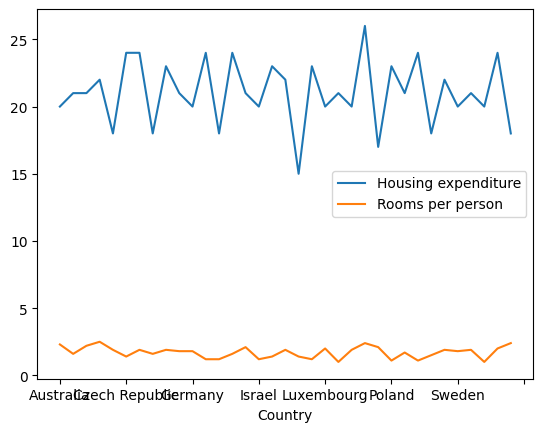

In [ ]:
td[['Housing expenditure','Rooms per person']].plot()

では、学生の学業スコア(student skills)でデータをソートする
- 表全体で並び替えていることに注目する

In [ ]:
td_s = td.sort_values('Student skills')

Student skillsとEducational attainment(学歴)の関係をみてみる
- mathplotlibは結構適当にデータをいれても意を組んで表示してくれる

<Axes: xlabel='Student skills'>

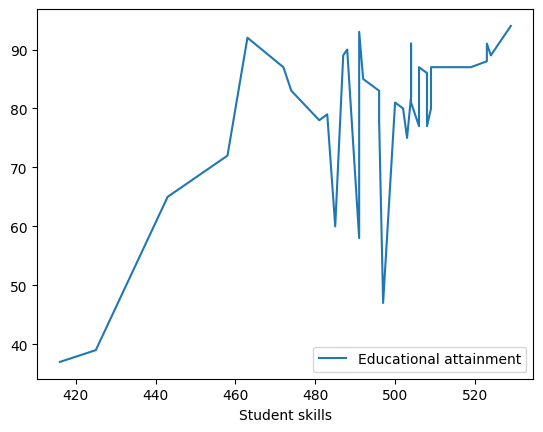

In [ ]:
td_s.plot(x='Student skills', y='Educational attainment')

### モデルの準備と学習(fitting)

回帰解析として、線形モデルを選択

In [ ]:
model = sklearn.linear_model.LinearRegression()

Student skillsとEducational attainmentのデータを配列にそれぞれコピーする
- ここでpythonの悪い癖が出る
  - td_s['Student skills']ではラベルがあるからダメで、これをto_numpy()として変換しても、今度は配列だからだめ
  - 配列の配列となるデータが欲しい

In [ ]:
x = td_s['Student skills']
x.head()

Country
Mexico             416
Turkey             425
Chile              443
Greece             458
Slovak Republic    463
Name: Student skills, dtype: int64

In [ ]:
x = td_s['Student skills'].to_numpy()
x

array([416, 425, 443, 458, 463, 472, 474, 481, 483, 485, 487, 488, 491,
       491, 492, 496, 496, 497, 500, 502, 503, 504, 504, 504, 506, 506,
       508, 508, 509, 509, 519, 523, 523, 524, 529])

次のようにすると変換できる
- 中身は各自で確認するとよい
- 次のセルに記述した方法以外にも、次のコードのような、より速い方法もある
```
x = np.c_[td_s['Student skills']]
y = np.c_[td_s['Educational attainment']]
```


In [ ]:
x = [[i] for i in td_s['Student skills'].to_numpy()]
y = [[i] for i in td_s['Educational attainment'].to_numpy()]

In [ ]:
print(x)
print(y)

[[416], [425], [443], [458], [463], [472], [474], [481], [483], [485], [487], [488], [491], [491], [492], [496], [496], [497], [500], [502], [503], [504], [504], [504], [506], [506], [508], [508], [509], [509], [519], [523], [523], [524], [529]]
[[37], [39], [65], [72], [92], [87], [83], [78], [79], [60], [89], [90], [58], [93], [85], [83], [78], [47], [81], [80], [75], [82], [91], [81], [77], [87], [86], [77], [80], [87], [87], [88], [91], [89], [94]]


学習させる

In [ ]:
model.fit(x,y)

LinearRegression()

### 結果検証

例えば、420点取る場合は、どの程度の学歴指数があるかを見る

In [ ]:
model.predict([[420]])

array([[52.39360017]])

グラフにするため、生成された近似1次関数をみる
- 単純に値を入れて、予測値を出して描画するのだが、numpy配列の配列のさらに配列という謎な構造になる
- 様々な直し方があり、例えば、
```
np.c_[py].flatten
```
とする方法もあるが、より直観的な方法として配列を外すために[0]として最初の要素を取り出すという操作を繰り返す

In [ ]:
px = []
py = []
for i in range(410, 530, 10):
  px.append(i)
  py.append(model.predict([[i]])[0][0])

結果をみてみると、なんとなく近似曲線が生成されていることがわかる

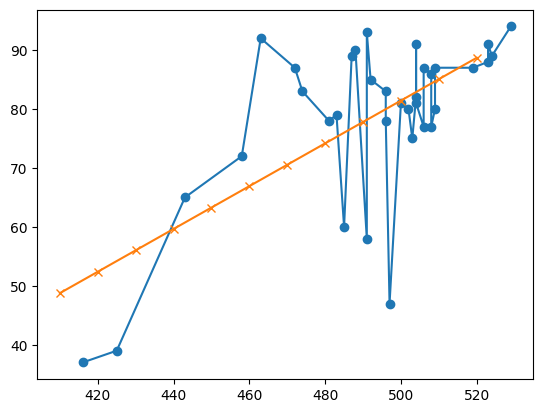

In [ ]:
plt.plot(x, y, marker='o')
plt.plot(px, py, marker='x')

## Scikit-learnによる重回帰分析

重回帰分析について、**Scikit-learnを用いた実装**を行う
- データセットは先程と同じ、$\boldsymbol{X}$と$\boldsymbol{t}$とする

Scikit-learnでは **パラメータ**$\boldsymbol{w}$が**バイアス** $\boldsymbol{b}$ **を包含しない** 形式を想定しているため、入力データ$\boldsymbol{X}$の1列目から$1$を取り除くこととなる

従って、
$$
\boldsymbol{X} =
\begin{bmatrix}
2 & 3 \\
2 & 5 \\
3 & 4 \\  
5 & 9
\end{bmatrix}, \
\boldsymbol{t} =
\begin{bmatrix}
1 \\ 5 \\ 6 \\ 8
\end{bmatrix}
$$
とする



### Scikit-learn の利用準備

Scikit-learnは`sklearn`という名前で呼び出す

In [ ]:
import sklearn

重回帰分析を使用する場合は以下のように必要な機能を呼び出す

In [ ]:
from sklearn.linear_model import LinearRegression

重回帰分析のアルゴリズムはクラスとして定義されており、実際のモデルを利用するにはインスタンス化する必要がある
- インスタンス化はクラス名の後に()をつけて行う


In [ ]:
model = LinearRegression()

### データの設定と学習(fitting)

以上で、重回帰分析ライブラリを使用する準備が整った

- パラメータの学習は以下のように行う

In [ ]:
X = np.array([
    [2, 3],
    [2, 5],
    [3, 4],
    [5, 9]
])
t = np.array([1, 5, 6, 8])

model.fit(X, t)

LinearRegression()

### 結果検証

結果の検証には、socreメソッドを用いるが、その実態は回帰の場合、次の**決定係数**とよばれる指標$R$を用いて計算される

$$
R^{2} = 1 - \dfrac{\sum_{i}\left( t_{i} - y_{i} \right)^{2}}{\sum_{i}\left( t_{i} - \bar{t} \right)^{2}}
$$

$R$は1に近い程相対的な残差が少ないことを意味する

なお、最小二乗法はこの値を最大にするパラメタの選択法であり、$R$をみることで、どの程度学習が進んだか、どの程度の精度が期待できるかを推し量ることができる


In [ ]:
model.score(X, t)

0.6923076923076923

**このように、Scikit-learnでは簡単なインターフェースで処理することが可能であり、どのアルゴリズムも`.fit()`で学習し、`.score()`で検証を行うように統一されている**
- `score()`はXを用いて`predict()`を内部で呼び出し、その結果とtを検証することに注意する
- またアルゴリズムによって多少異なるが、パラメータもインスタンス変数として格納されており、学習後に確認可能である

In [ ]:
# パラメータw (coefficient)
model.coef_

array([0.71428571, 0.57142857])

In [ ]:
# バイアスb (intercept)
model.intercept_

-0.14285714285714235

## サンプルデータセットによるより実践的な例

Scikit-learnは機械学習の実装を支援する多くの機能を有する

そこで、サンプルデータセットの使用方法及びデータセットの分割方法について述べる

### サンプルデータセットの使用

Scikit-learnでは幾つかのデータセットがあらかじめ提供されており、すぐに学習を始めることができるように工夫されている
- その中から、米国カリフォルニア市郊外における地域別の物件価格のデータセット California Housing を取り上げて利用する
- California Housingは、1990年米国カリフォルニアの住宅価格のデータセットであり、データ数は20,640件である
- California Housingでは、データ1つ1つが1世帯に対応しているわけではなく、カリフォルニアの1地区に対応し、データ自体はこれらの平均や中央値が利用されている
  - カリフォルニアの20,640地区に相当するデータとなっており、1世帯に対応しているわけではない
  
> データセットの詳細

| | |
|:-:|:-:|
|レコード数 | 20,640 |
|カラム数	| 8 |

> 各カラムの構成

| | | |
|:--|:-:|:--|
|Medlnc	|世帯所得の中央値	|各地区における世帯平均所得、単位は10,000ドル|
|HouseAge	|家の築年数	|各地区における家の平均築年数、単位は年|
|AveRooms	|部屋の平均数 |各地区における平均の部屋数|
|AveBedrms |寝室の平均数 |各地区における平均の寝室数|
|Population	|居住人数の合計	|各地区における合計の居住人数数|
|AveOcuup	|世帯人数の平均	|各地区における平均の世帯人数|
|Latitude	|平均緯度	|各地区における代表地区の緯度（各地区におけるすべての家の緯度の平均だと思われる）|
|Longitude |平均経度 |各地区における代表地区の経度（各地区におけるすべての家の緯度の平均だと思われる）|

In [ ]:
# 人種倫理問題により bostonデータセットは公式データセットから外されている
#from sklearn.datasets import load_boston
#housing = load_boston()
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

寄り道として、データの中身をpandasのデータフレームとして表示させて確認する
- 中身はdataオブジェクト、特徴量はfeature_namesオブジェクト、目的変数になる住宅価格はtargetオブジェクトで見ることができ、大量にデータがあるときは、ちゃんと間を抜いてくれる賢さも備えている

In [ ]:
import pandas as pd
pd.DataFrame(housing.data, columns=housing.feature_names)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [ ]:
housing.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

では実際に変数に入れて処理をすすめる
- 先の例にならいhousing.dataとしているが、housing['data']などとして取得することもできる
- 中身を確認するとNumPy形式で入力データと教師データが格納されていることがわかる

In [ ]:
X = housing.data
t = housing.target
X

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [ ]:
t

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

次に、shapeメソッドで行と列の数を確認する

In [ ]:
X.shape

(20640, 8)

In [ ]:
t.shape

(20640,)

このように、配列$X$には$20,460$件分のデータが格納されており、各サンプルは$8$次元ベクトルである
- 教師データ$t$には、入力変数に対応する出力変数として、平均物件価格のスカラー値が格納されている

### データセットの分割

つぎにこの学習データを**訓練データ**と**テストデータ**に分割する
- このように分割して検証することを**ホールドアウト法**とよび、このホールドアウトを次々と場所を移動させて検証することを**交差検証**と呼ぶことはすでに説明済みである
- なお、学習に使ったデータをモデルの性能評価に使うと、未知のデータに対する性能が低くなる可能性があるため、これを回避する必要がある

データの分割法は様々あり、どの方法がよい、悪いということはない
- ささっと、簡単に結果を得たい場合、じっくり時間をかけてより精度よく評価したいなどのニーズによって切り替えることになる

- 乱択

 データセットからランダムに一部のデータを抜き取ってテストデータとする最もシンプルな方法
  - Scikit-learnではtrain_test_split()が用意されており、どれだけ取り出すかの割合を指定する

- 交差検証(Cross-Validation)

 乱択では、トレーニングデータとテストデータの分割で偏りがあった場合予見できないバイアスが生まれる可能性があるため、これを避けるのがクロスバリデーションである
  - Scikit-learnではcross_val_scoreが用意されており、繰り返し検証も含めて処理するため、train_test_split()と同列ではなく、より高位の処理を行う\
ループや途中結果をいつ出すかも含めて自動化するため様々な引数が存在しているので、各自確認するとよい

さて、ここではシンプルにtrain_test_split()を用いる
- この関数の引数test_sizeを用いて検証用に使うデータの比率を指定できる
- また、random_stateは乱数のシードで、固定のシード値を与えることで、分割の再現性を確保でき、その他、シャッフルするかどうか、いくつのセットに分割するかなどが指定できる
- 例では2つ(Xとt)の入力変数をそれぞれ分割するが、3つ以上でも問題ない

さらに分割時にラベルの偏りを避ける機能(stratify)なども存在する
- この機能は、例えば乱択すると、目的変数に偏りが発生し、0や1しか存在しないグループができる可能性があるが、そういうことがないように0や1の存在確率をそろえる機能である

何をするにも、準備されているため数行で処理できる手軽さがScikit-learnであるが、それよりも、**どうしてその機能が備わっているのか**の理由を知ることが重要である

実際にデータを分割する
- ここではtest_sizeを$0.3$としており、全体の$30$%、6,192個をテストデータとして利用する

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.3, random_state=0)
X_train.shape

(14448, 8)

In [ ]:
X_test.shape

(6192, 8)

In [ ]:
X_train

array([[   1.975     ,   52.        ,    2.8       , ...,    4.825     ,
          36.73      , -119.79      ],
       [   2.2604    ,   43.        ,    3.67148014, ...,    3.01805054,
          37.77      , -122.21      ],
       [   6.299     ,   17.        ,    6.47802198, ...,    3.81043956,
          33.87      , -118.04      ],
       ...,
       [   3.1977    ,   31.        ,    3.64122137, ...,    1.7913486 ,
          36.58      , -121.9       ],
       [   5.6315    ,   34.        ,    4.54059829, ...,    2.24786325,
          33.62      , -117.93      ],
       [   1.3882    ,   15.        ,    3.9295302 , ...,    3.43624161,
          32.8       , -115.56      ]])

In [ ]:
X_test

array([[   4.1518    ,   22.        ,    5.66307278, ...,    4.18059299,
          32.58      , -117.05      ],
       [   5.7796    ,   32.        ,    6.10722611, ...,    3.02097902,
          33.92      , -117.97      ],
       [   4.3487    ,   29.        ,    5.93071161, ...,    2.91011236,
          38.65      , -121.84      ],
       ...,
       [   7.875     ,   30.        ,    7.55092593, ...,    2.4212963 ,
          33.89      , -117.91      ],
       [   2.0658    ,   34.        ,    5.93814433, ...,    3.74226804,
          36.56      , -119.64      ],
       [   4.6761    ,   32.        ,    5.31515152, ...,    2.77878788,
          37.36      , -121.99      ]])

### 訓練と検証

次に、訓練データを用いて学習を行う
- モデルを指定し、fitメソッドで学習を行う

In [ ]:
model = LinearRegression()
model.fit(X_train, t_train)

LinearRegression()

検証はscoreメソッドを呼び出す
- 訓練データとテストデータの両方に対して確認するとよい

In [ ]:
# 訓練データ
model.score(X_train, t_train)

0.6112941337977225

In [ ]:
# テストデータ
model.score(X_test, t_test)

0.5926087785518772

テストデータと訓練データの両方を検証することで、学習に失敗しているかどうかの確認が可能となる

モデルが訓練データに対して良い精度で予測できない状態として、２つの理由が考えられる

- **訓練データでのscoreが低い場合**

 この場合は**アンダーフィッティング(未学習)**が疑われる\
この場合の対処法はハイバイアスを参照

- **訓練データのみsocreが高い場合**

 この場合は**オーバーフィッティング(過学習)**が疑われる\
この場合の対処法はハイバリアンスを参照

望ましい結果が得られない場合であっても、それぞれの状況を把握することで次に打つべき対策が見えてくる
- 訓練データとテストデータの両方に対する検証を行うことは重要である

### 学習スコア曲線を描く

ここでは、次のようにして曲線を求める
- train_sizes配列を準備し、サンプルをとるイテレーションを指定する
- learning_curveを用いて、途中結果を保存しながら訓練を進める
- 途中結果が、train_scoresとtest_scoresに配列として代入される
- 中身を確認する

中身をプロット標準偏差込みでプロットすると、訓練が進む様子がわかる

In [ ]:
from sklearn.model_selection import learning_curve
train_sizes = np.arange(50, 6192, 5)
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, t_train, cv=3, train_sizes=train_sizes, random_state=42, shuffle=True
)
print("train_sizes(検証したサンプル数): {}".format(train_sizes))
print("------------")
print("train_scores(各サンプル数でのトレーニングスコア): \n{}".format(train_scores))
print("------------")
print("test_scores(各サンプル数でのバリデーションスコア): \n{}".format(test_scores))

train_sizes(検証したサンプル数): [  50   55   60 ... 6180 6185 6190]
------------
train_scores(各サンプル数でのトレーニングスコア): 
[[0.68064553 0.65424681 0.6557975 ]
 [0.68957971 0.65891744 0.63838293]
 [0.69749833 0.63578215 0.63791195]
 ...
 [0.60971044 0.63009297 0.60463788]
 [0.60961961 0.62998499 0.60454933]
 [0.6099877  0.62961404 0.60496495]]
------------
test_scores(各サンプル数でのバリデーションスコア): 
[[ -8.24690674  -0.87701782   0.47495512]
 [-14.12442268  -1.08325429   0.5567105 ]
 [-14.59026592  -1.80414941   0.51937653]
 ...
 [  0.59754487   0.6021842    0.60354302]
 [  0.59754404   0.60217678   0.60353152]
 [  0.59755401   0.6021731    0.6035108 ]]


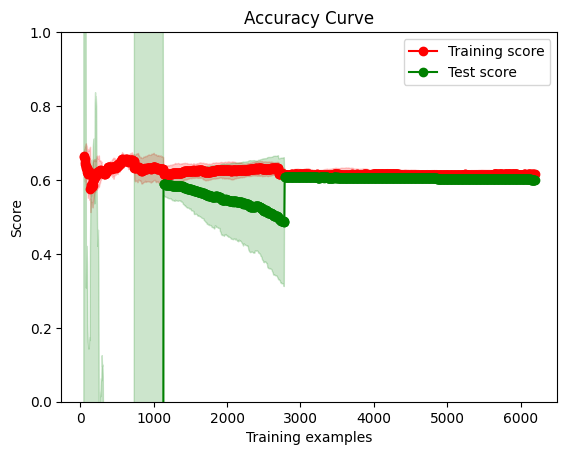

In [ ]:
import matplotlib.pyplot as plt
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.figure()
plt.title("Accuracy Curve")
plt.xlabel("Training examples")
plt.ylabel("Score")
# Traing score と Test score をプロット
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Test score")
# 標準偏差の範囲を色付け
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, color="r", alpha=0.2)
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, color="g", alpha=0.2)
plt.ylim(0.0, 1.0)
plt.legend(loc="best")
plt.show()

### mlxtend

https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html

学習における各種チューニングなどに、mlxtendを用いることができる
- mlxtendは、機械学習やデータ分析等のタスクにおいて学習曲線のプロットやStackingといったscikit-laernやmatplotlibに含まれない機能を提供する

mean_absolute_errorrつまり、エラーの評価であるが、テストに対しては40%以上確保すれば、それなりによいことがわかる

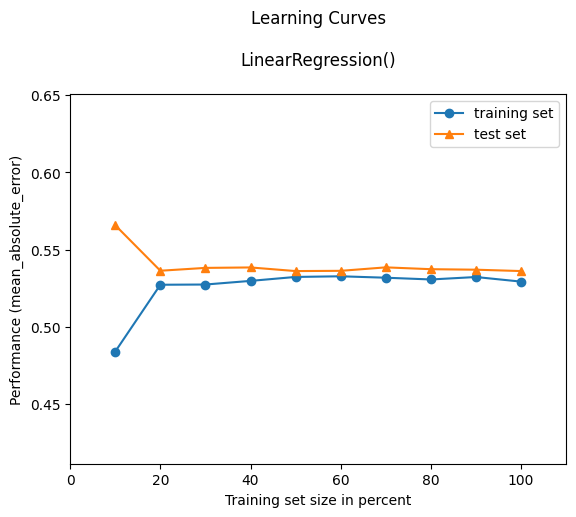

In [ ]:
from mlxtend.plotting import plot_learning_curves
plot_learning_curves(X_train, t_train, X_test, t_test, model, scoring='mean_absolute_error')
plt.show()

## スケーリング

Scikit-learnはスケーリングも可能である。例えば、平均0、標準偏差1に変換するデータ正規化を行うには次のようにする

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

訓練データを用いて、平均と分散を計算する

In [ ]:
scaler.fit(X_train)

StandardScaler()

求めた平均・分散を用い、訓練データ及びテストデータをスケーリングする
- 値の絶対値の大きさによる影響、値の偏差の大きさによる影響を抑えて評価することができる


In [ ]:
# 変換
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

テストデータをスケーリングする際、訓練データ全体から求めた平均・分散を利用していることに注意する
- 各テストデータ単独で平均・分散を求めると、異なるスケールのデータで学習を行うことになるため、正しい学習結果が期待できない

また、訓練データ全体であって、検証用データを含む元のデータ全体の平均・分散でもないことにも注意する
- テストデータはモデルにとって未知のデータセットにしなければならず、全データの平均・分散を利用すると、本来知りえないテストデータの情報をモデルに与えていることになる

以下、内容確認を行うが、正規化前のX_train, X_testと比較すると良い

In [ ]:
X_train_s

array([[-1.00030408,  1.8562098 , -1.146823  , ...,  0.25982829,
         0.51396387, -0.11131397],
       [-0.84938602,  1.14171192, -0.76585476, ..., -0.00327132,
         0.99993462, -1.3173838 ],
       [ 1.28620508, -0.92239307,  0.46102722, ...,  0.11210392,
        -0.82245571,  0.76084397],
       ...,
       [-0.35374656,  0.18904808, -0.77908241, ..., -0.1818844 ,
         0.44387193, -1.16288725],
       [ 0.93323448,  0.42721404, -0.38591908, ..., -0.1154139 ,
        -0.9392756 ,  0.81566532],
       [-1.31060093, -1.08117038, -0.65304797, ...,  0.05761909,
        -1.32244485,  1.99681635]])

In [ ]:
X_test_s

array([[ 0.15077666, -0.5254498 ,  0.10477153, ...,  0.16599986,
        -1.42524636,  1.25423617],
       [ 1.01154901,  0.26843673,  0.29893351, ..., -0.00284492,
        -0.79909173,  0.79573028],
       [ 0.25489638,  0.03027077,  0.22177006, ..., -0.01898759,
         1.41114065, -1.13298469],
       ...,
       [ 2.11958585,  0.10965942,  0.93004803, ..., -0.09016131,
        -0.81311012,  0.82563284],
       [-0.95228951,  0.42721404,  0.22501928, ...,  0.10217786,
         0.43452634, -0.03655757],
       [ 0.42802383,  0.26843673, -0.04732252, ..., -0.038109  ,
         0.80835   , -1.20774109]])

### スケーリングされたデータを用いた訓練と検証

今回は、スケーリングを行っても結果は殆ど変わらない結果となる

In [ ]:
model.fit(X_train_s, t_train)
# 訓練データ
print(model.score(X_train_s, t_train))
# テストデータ
print(model.score(X_test_s, t_test))

0.6112941337977225
0.5926087785518777


# 分類の王道

ノーフリーランチ、つまり、必ずうまくいく方法はない

大学の授業ならば、全部教えて学生を試すのも悪くないであろうが、この授業はそういう授業ではなく、やみくもに何でも試すことや全て覚えることは効率が悪い

- 普通なら通年かけて教えるような内容、それを高々10数回の授業で扱うため、使い方に専念し、例を示して、メリハリをもって効率を最大化するしかない
- 結局与えられたデータを最もよく知っているのは、そのデータを集めた人、持っている人なのだから、その人の感覚でデータサイエンスするしかない
  - 特に個別にデータの前処理を考え、最適と考える手法を順次とらざるをえない
- 残念ながら、その個別対処の感覚を教える、習得するのはなかなか難しく、データを図示して発見しそれぞれ対応していくしかない

例えばであるが、ある機械の運転振動を取得し、そこから異常つまり故障に繋がる重大な予兆を発見し壊れる前に対応する、そういうことができるなら、今すぐ会社を興してお金儲けすればよい
- だが、例えば冷房機器であれば夏の異常気象の日は、とにかくフル運転を行い、そういう状況が年2回程度しかない、ということになれば、これは普通にやれば異常と判断されてしまい、暑い日になるとあちこちで異常ではないのに、異常・異常と通知してくる欠陥システムになる
- その他、システムの再起動や、現場のメンテナンスが入った時も異常となれば、これも困る
- これらシステム負荷の高いときや、メンテナンスなどの振動を排除した結果、本当の故障に繋がる予兆を逃すことは避けたい

結局そういうせめぎあいの中で**どのようにデータを解釈し何に注目して異常と判断するのか**を探るしかない
- ここで扱うのは、この**判断する**ところであり、データの解釈や注目点については、それぞれで判断することとなる
- 要するに「各個考えて撃破せよ」ということであるが、**それでも分類を考えるなら、王道があるでしょ？**ということで、ここではSVM(Support Vector Machine)とRandom Forestを取り上げ、LightGBMについても触れる

もちろん、相手が画像やら、動画やら、音声やらを扱うならば、本格的なDNNを扱う必要があるが、それ以外の普通のデータにDNNを使うのはお芋を太陽で焼くようなものである

だが、考えようはいろいろで、初回授業でも扱った、シンプルなDNNを用いるのも、計算コストをあまり気にしないならば悪くないであろうし、DNNを使ったらカッコいいと考えるのも悪くなく、あまりよく知らない人をだましてお金を稼ぐにはよい道具であろう

一方で例えば、上記の例で、振動情報データが大量にあり、これを**画像のように扱って**DNNで捉えるというのは、あながち誤っている方法とはいえない

AIをやたらと語る悪徳業者に騙されないためにも、基本素養を身に着けておくべきであるし、ともすれば、気付かぬうちに、そいういう悪徳業者に自分のチームがなりかねない
- 「このデータはDNNの弊社システムを使って結果が出せます、〇〇万のお見積りとなります」という悪徳業者に対して、「では、私ならばその半額かつ1/4の計算量で同様の結果を出すので、逆にお勧めする、買っていただきたい」ぐらい言えばよい

## SVM(サポートベクトルマシン)とRF(ランダムフォレスト)

教師ありでデータを分類したいというのは、よくあるニーズである

タイトルはともかく、もし、SVMやランダムフォレストの選択を考えるのであれば、同様にまずはLightGBMを選択も想定するべきである
- LightGBMは、ランダムフォレスト(RF)の発展形で、基本的な特徴はRFに準拠すると考えてよい
- つまり、LightGBMは最強ともいえ、これだけ知っていればなんとかなるといっても過言ではない

とはいえ、まずは、SVMとRFについて、どのように選択するのかを、次の点に着目して考えよう

1. データ数が多いか？
 - 多いなら、RFは効率が良い
 - 少ないなら、SVMは良い選択肢である

> SVMは、データ数$n$に対して、$O(n^2\cdot n)$の計算コストが伴うといった報告があり、データが増えると計算コストが二乗で効いてくる
> - RFは一つの分類木を構成することを考えれば、$O(\sqrt n)$程度とされている

1. 次元数は多いか？
 - RF次元数の増大に対応しやすい
 - 少ないならば、SVMもよい

1. データの軸は想定する分類に対して明確に寄与する特徴量であるといえるか？
 - いえるならば、まずはRFを試す
 - いえないならば、まずはSVMを試す

> これは、もう少し両者の本質的な違いを見つめる必要がある
> - SVMは滑らかな分離調平面を利用して分類する
>   - 境界面を美しくしやすいが、これを大量に引くのは大変
> - RFは直線的境界を引きまくって境界線を構築する
>   - つまり、その軸の特徴を前面に押し出して分類する傾向がある
>   - RFは境界面がぐちゃぐちゃ
>
> この特徴をどのように考えるか、ということであり、RFが過学習気味になりやすいといわれるのも納得であろう

但し、迷ったらまずはLightGBMやRFというのも事実であり、その主な理由はRFが以下の点で方法論としてかなり完成していることが挙げられる
- そもそもハイパーパラメータが少なく、初心者でも扱いやすいうえに、そのパラメータも触る必要は殆どない
- OOB(Out-Of-Bag)が36%程度、丁度ネイピア数の逆数($e^-1$)になり、そのまま交差検証として利用できる
- 特徴の重要度を求めることができるため、特徴量選択にそのまま利用できる
- 予測確率が条件の組み合わせなので、単純に独立試行の繰り返し、つまり、確率の乗法定理で求まる

といったメリットがある

もう色々面倒だ、という観点からNNを利用するという考え方もあろう



## サポートベクトルマシン

予測にはデータを使うが、外れ値のような余計なデータを使うと予測精度が低下する
- つまり**真に予測に必要な一部データのみ**を利用する必要があるが、このようなデータを**サポートベクトル**と呼ぶ

このサポートベクトルを用いる手法がサポートベクトルマシンである
- 2値分類を基本とするが、多値分類への拡張も行われている

SVMは基本的には線形分離を拡張し、$n$個の特徴量で作られる$n$次元空間上の集合を複数の$n-1$次元の超平面(**分割超平面**)で分割することで分類を行うが、特にこの平面に近いデータ(**これをサポートベクトルとする**)との距離(**マージン**)を最大化することを目的とする
- また、線形分離可能なデータを前提としたマージンを**ハードマージン**、線形分離不可能なデータを前提として、誤判別を許容するマージンを**ソフトマージン**と呼ぶ
  - ハードマージンでは、とにかく明確に領域を分割しエラーを許さないが、融通の利かない分類となる
  - ソフトマージンは、あいまいにエラーを許容して分類することになる

<img src="http://class.west.sd.keio.ac.jp/dataai/text/svm-basis.png" width=400>

## ハードマージンによる分類

さて、重回帰分析の「Step1.モデルの決定」でも述べたが、重回帰分析では、単回帰解析の式を複数の入力変数へと拡張し、次の線形結合を考えた

$$
y=w_{1}x_{1}+w_{2}x_{2}+\ldots +w_{M}x_{M}+b
$$

これは、ここで想定する超平面と似ており、この$y=0$とした式で超平面を与えることができる
- なお、ここでは次元数を$n$とする
$$
w_{1}x_{1}+w_{2}x_{2}+\ldots +w_{n}x_{n}+b=0
$$
これを行列式でまとめてかけば、
$$W^TX + b = 0$$
となる

この超平面で分類できるとするならば、$X$について$i$番目のデータ$X_i$をこの式に代入すると、当該超平面の法線ベクトルの向きと同じ側にあるか、ないかで2分されることになる
- つまり、赤▲データが$K_1$集合、図の青★データが$K_2$集合に属するとすると、これらを分類する一つの形として$i = 1, 2, 3,\cdots,n$とすると次の式を満たすことが考えられる

$$
W^TX_i + b > 0 \quad (X_i \in K_1)\\
W^TX_i + b < 0 \quad (X_i \in K_2)\\
$$

これを式変形の都合上、一つの式で表すため、ラベル変数$t$を導入し、$i$番目のデータ$x_i$がクラス$K_1$に属するときに$t_i=1$、クラス$K_2$に属するときに$t_i=-1$とする

$$
t_i = \left\{
\begin{array}{ll}
1 & (X_i \in K_1) \\
-1 & (X_i \in K_2)
\end{array}
\right.
$$

この$t_i$を用いることで、次のように表記できる

$$t_i(W^TX_i + b) > 0 \quad (i = 1, 2, 3, ...n)$$

マージン$M$はn次元空間上の点と超平面の距離$d_i$を求めることになり、

$$
d_i = \frac{|w_1x_1 + w_2x_2... + w_nx_n + b|}{\sqrt{w_1^2+w_2^2...+w_n^2}} = \frac{|W^TX_i + b|}{||w||}
$$

と表すことができ、これを最大化することから、

$$
\mathrm{max}_{w, b}M, \frac{t_i(W^TX_i + b)}{||W||} \geq M  \quad (i = 1, 2, 3, ...N)
$$

ここで、$\frac{t_i(W^TX_i + b)}{||W||} \geq M $の両辺をMで割り、$
\frac{W}{M||W||} = \tilde{W}$さらに、$\frac{b}{M||W||} = \tilde{b}
$と置き換えれば、次の式を満たす最大の$M$を求めることになる

$$
t_i(\tilde{W^T}X_i + \tilde{b}) \geq 1
$$

さて、$\tilde{W}$や$\tilde{b}$と同様に$\tilde{M}$を考えると、$
\tilde{M}=\frac{M}{M||W||}=\frac{1}{||W||}$となり、これを用いて、

$$
\mathrm{max}_{\tilde{W}, \tilde{b}}\frac{1}{||\tilde{W}||}, \quad　t_i(\tilde{W^T}X_i + \tilde{b}) \geq 1 \quad (i = 1, 2, 3, ...N)
$$

となる

$\frac{1}{||\tilde{W}||}$はL1ノルム($L_1=|x_1|+|x_2|+\cdots +|x_n|$)の逆数を最大化することであり、意味を変えずに扱いやすいように変形する
- 例えば、L2ノルム$L_2=\sqrt{x_1^2+x_2^2+\cdots +x_n^2}$の二乗の半分を最小化するというよくある解釈をすると次のようになる

$$
\mathrm{min}_{W, b}\frac{1}{2}||\tilde{W}||^2, \quad t_i(\tilde{W}^TX_i + \tilde{b})\geq 1 \quad (i = 1, 2, 3, ...N)
$$


## ソフトマージンによる分類

ハードマージンのみ想定すると、誤りのない境界しか想定できないため、融通が利かない
- そこで、誤りをある程度認めるソフトマージンを考える

具体的には、

$$
\mathrm{min}_{W, b}\frac{1}{2}||\tilde{W}||^2, \quad t_i(\tilde{W}^TX_i + \tilde{b})\geq 1 \quad (i = 1, 2, 3, ...N)
$$

この条件を緩和する必要がある
- 緩和は簡単に行うことができる

<img src="http://class.west.sd.keio.ac.jp/dataai/text/svm-soft.png" width=400>

マージンに入り込んで境界を明確に定められない赤▲や青★、例えば$X_i$は、先ほどの条件式の$\geq 1$を満たすことはできないかもしれないが、例えば$\geq 0.5$ならば満たすことができるかもしれない
- そこで、スラッグ変数$\xi$を導入し制約条件を緩めるという方針をとる

$$
t_i(\tilde{W}^TX_i + \tilde{b})\geq 1 - \xi_i \\
\xi_i = \mathrm{max}\Bigl\{0, \tilde{M} - \frac{t_i(\tilde{W}^TX_i + \tilde{b})}{||\tilde{W}||}\Bigr\}
$$

ここで、$\tilde{}$を省略し、全ての$X_i$についてこの条件を当てはめれば、マージン最小化問題は次のように表すことができる

$$
\mathrm{min}_{W, \xi}\Bigl\{\frac{1}{2}||W||^2 + C\sum_{i=1}^{N} \xi_i\Bigr\}\\
cond. \quad
t_i(W^TX_i + b)\geq 1 - \xi_i\\
\xi_i = \mathrm{max}\Bigl\{0, M - \frac{t_i(W^TX_i + b)}{||W||}\Bigr\} \quad
i = 1, 2, 3, ... N
$$

ここで、最小化条件に$C\sum_{i=1}^{N} \xi_i$が加えられている点に注意する
- これは、スラッグ変数$\xi$自体が、なるべく小さい値であるべきという条件を意味し、どれだけ緩和するか？を調整するためハイパーパラメータ$C$が重みとして与えられている
- $C$は、一般にコストパラメータと呼ばれている

## ラグランジュの未定乗数法の利用

この式を直接解かずに、別の式、すなわち**双対問題**を用いて最適化問題を解く- ここではラグランジュの未定乗数法を用いる

[高校数学の美しい物語](https://mathtrain.jp/mlm)という名前のおかしいサイトが詳しい

既に学習した形を以下のように拡張して用いる
- 目的関数$f(X)$を$n$個の不等式制約$g(X)_i \geq 0, i=1,2,3,\cdots,n$の条件下で最小にするとは、ラグランジュ関数$L(X, \alpha) = f(X) + \sum_{i=1}^{n}\alpha_ig_i(X)$について次の条件を満たす$(\tilde{X}, \tilde{\alpha})$を求めることである

$$
\frac{\partial L(X, \alpha)}{\partial X}=0\\
\frac{\partial L(X, \alpha)}{\partial \alpha_i} = g_i(X)\leqq 0, \quad (i=1, 2,... n)\\
0 \leqq \alpha, \quad (i = 1,2, ...n)\\
\alpha_ig_i(X) = 0, \quad (i = 1, 2,...n)
$$

さて、今回のラグランジュ関数は、目的関数($\mathrm{min}$の式)から、

$$L(W,b,\xi,\alpha,\beta)=\\
\frac{1}{2}||W||^2 + C\sum_{i=1}^{N} \xi_i-\sum_{i=1}^{N}\alpha_i\bigl\{t_i(W^TX_i+b)-1+\xi_i\bigl\}-\sum_{i=1}^{N}\beta_i\xi_i
$$

となり、

$$
\frac{\partial L(W,b,\xi,\alpha,beta)}{\partial W}= W - \sum_{i=1}^{N}\alpha_it_iX_i=0\\
\frac{\partial L(W,b,\xi,\alpha,\beta)}{\partial b}= -\sum_{i=1}^{N}\alpha_it_i = 0\\
\frac{\partial L(W,b,\xi,\alpha,\beta)}{\partial W} = C - \alpha_i -\beta_i = 0
$$

を解けばよい

整理すると、

$$
W =\sum_{i=1}^{N}\alpha_it_iX_i\\
\sum_{i=1}^{N}\alpha_it_i = 0\\
C = \alpha_i + \beta_i
$$

となる

これをラグランジュ関数に代入して整理すると、

$$
\tilde{L}(\alpha) = \sum_{i=1}^{N}\alpha_i - \frac{1}{2}\sum_{i=1}^{N}\sum_{i=j}^{N}\alpha_i\alpha_jt_it_j{X_i}^TX_j
$$
となる

結果的に、下記条件を満たす$\alpha$を求めればよい

$$
max\Bigl\{{\tilde{L}(\alpha) = \sum_{i=1}^{N}\alpha_i - \frac{1}{2}\sum_{i=1}^{N}\sum_{i=j}^{N}\alpha_i\alpha_jt_it_j{X_i}^TX_j\Bigr\}}\\
\sum_{i=1}^{N}\alpha_it_i = 0, \quad 0 \leqq \alpha_i \leqq C, i = 1,2,...N
$$







## サンプルコード

ここで、実際にSVMを用いて分類を行う
- 例として、次のコードはある動物の身長と体重を$x$、雄・雌の種別を$t$として与えてこれをSVMを用いて分類する
- さらに、特に工夫のない線形分離を用いて行う

In [ ]:
from sklearn.svm import SVC
import numpy as np
x = np.array([[12, 15], [10, 20], [13, 23], [10, 30], [13, 36], [12, 39]])
t = np.array([0, 0, 0, 1, 1, 1])
model = SVC(kernel='linear', random_state=None)
model.fit(x, t)
from sklearn.metrics import accuracy_score
t_p = model.predict(x)
accuracy = accuracy_score(t, t_p)
accuracy

1.0

精度が1.0つまり、100%となり完全正解となるが、以下のようにデータを見ると「さもありなん」ということがわかる
- ここでは、様々な手法をあえて伝えるという観点から、mlxtendを用いて表現する

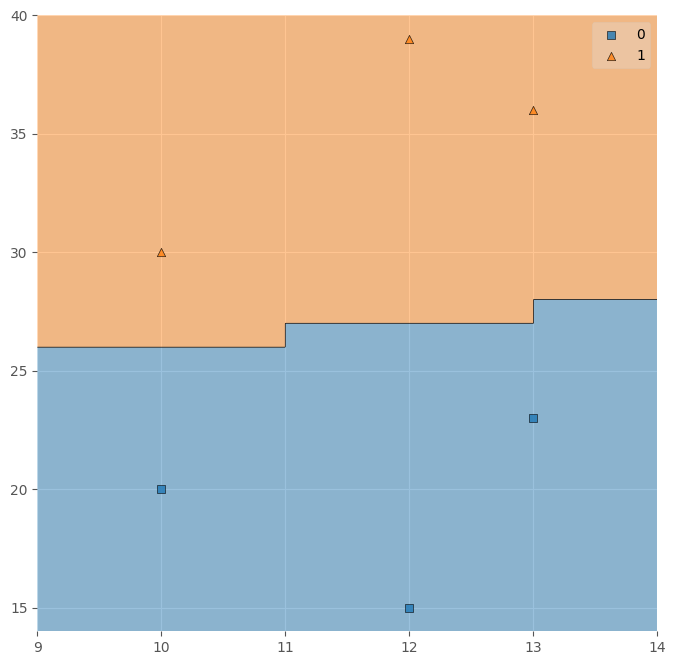

In [ ]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
plt.style.use('ggplot')
fig = plt.figure(figsize=(8,8))
plot_decision_regions(x, t, clf=model)
plt.show()

直線で完全に分離可能であることがわかる
- 実際の分類結果は次の通りである

In [ ]:
t_p

array([0, 0, 0, 1, 1, 1])

さて、SVMが正しく分類できることが分かったところで、弱点を突く問題を与える
- 以下のようなデータを用いて同様に学習させる
- 精度は72%、良くはないが、何かしら学習ができたかのように見える

In [ ]:
from sklearn import svm
import numpy as np
x = np.array([[12, 10], [12, 15], [10, 20], [13, 22], [10, 34], [13, 36],
  [12, 39], [12, 37], [12, 25], [12, 29], [11, 27]])
t = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1])
model = SVC(kernel='linear', random_state=None)
model.fit(x, t)
from sklearn.metrics import accuracy_score
t_p = model.predict(x)
accuracy = accuracy_score(t, t_p)
accuracy

0.7272727272727273

同様に結果を視覚化する

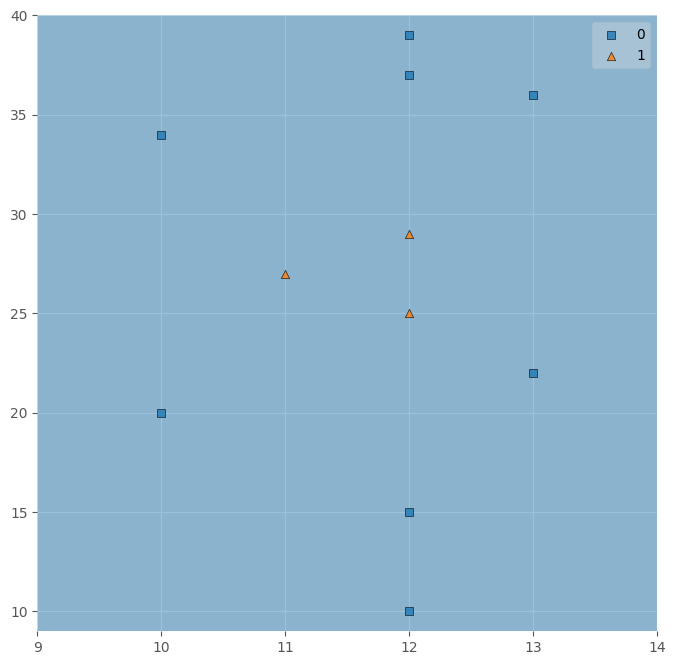

In [ ]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
plt.style.use('ggplot')
fig = plt.figure(figsize=(8,8))
plot_decision_regions(x, t, clf=model)
plt.show()

結果を見ると、今度は赤つまり雌の個体が雄の個体の中に囲まれるように存在するため、直線で分離することはできない
- 結局全体を雄と判定する道をえらんでしまった
- 確認すると、次のように全て0=雄と判定している


In [ ]:
t_p

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## カーネル法の利用

カーネル法(kernel method)はデータを高次元の特徴空間上へ写像することで分類を易化する手法で、より分かりやすく言えば、先ほどの失敗したデータに何かしら工夫をすれば、SVMの線形分離で分類できるのではないか、と考える

まずは、その概念を理解する
- $x=[x_1, x_2]$として、例えば、$(X_1+X_2-39)^2$を計算すると次のようになる
  - sumメソッドは、要素の合計を求め、axisで合計の方向を行としている
  - -39と記述しているがブロードキャストという手法により行列の全要素について計算される

In [ ]:
newx = (x.sum(axis=1)-39)**2
newx

array([289, 144,  81,  16,  25, 100, 144, 100,   4,   4,   1])

pythonに慣れてもらうために別の方法も記しておく
- 0番目の要素と1番目の要素は記述できるため次のようしてもよい

In [ ]:
newx = (x[:,0]+x[:,1]-39)**2
newx

array([289, 144,  81,  16,  25, 100, 144, 100,   4,   4,   1])

いずれも等しい配列を与えるが、これに対して10未満という条件を与えると、条件式もブロードキャストされ、次のような結果を得る
- FalseとTrueは条件で偽および真を与え、条件が成立しなかった、成立した、を表す
- なお、int(True)は1、int(False)は0となる

In [ ]:
newx<10

array([False, False, False, False, False, False, False, False,  True,
        True,  True])

少し寄り道するが、次のように記述するとTrueが何番目の配列の要素かを知ることができる
- enumerateは配列の要素番号と値を与える

In [ ]:
[i for i, x in enumerate(newx) if x < 10]

[8, 9, 10]

さて、グラフを描く際に、10未満のデータについては赤つまりr、それ以外は青つまりbで記述したい
- 先ほどのnewxについて、bおよびrを与える配列を生成するには、次のようにすると美しい

In [ ]:
[['b','r'][int(i<10)] for i in newx]

['b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'r', 'r', 'r']

この辺りがpythonがトリッキーで面白いと感じるところかもしれない
- 脱線ついでにどんどん脱線する
- 例えば、より素直な方法として、つぎのように記述するとよく、今回はこれが最も短くなり、お勧めである

In [ ]:
['r' if i<10 else 'b' for i in newx]

['b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'r', 'r', 'r']

3項演算子も含んだ形として

**[式1 if 条件式1 else 式2 for 変数名 in リスト if 条件式2]**

とすると、リストのうち条件式2を満たす要素について、その値が条件式1を満たすなら式1、満たさなければ式2の値を要素とする配列となる
- 各条件式の部分は省略できる

さらに脱線すると、ラムダ式を用いると次のようにもできる

In [ ]:
list(map(lambda x: 'r' if x<10 else 'b', newx))

['b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'r', 'r', 'r']

このように段階を踏んでくれれば何とかなるだろうが、いきなり次のように記述されると、なかなかつらいのではないだろうか

In [ ]:
['r' if i<10 else 'b' for i in (x.sum(axis=1)-39)**2]

['b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'r', 'r', 'r']

もっと脱線してみよう
- 簡単な関数を定義してもよいならば、次のようにも記述できる
- map関数はシーケンスを返すためlist関数を利用する必要がある

なお、処理速度が遅くお勧めではないが、関連する項目として**numpy.apply_along_axis**があるので各自調べると良いであろう

言いたいことは、**pythonは自由度が少なく、決められた書き方に従うため、ソースコードが読みやすいなどという迷信を吹き込むのはやめてくれ**である


In [ ]:
def borr(n):
  return 'r' if n < 10 else 'b'
list(map(borr, newx))

['b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'r', 'r', 'r']

脱線したが、次のように色分けして表示する
- もうわかっていただけたかと思うが、何かしらの変換に基づく計算により直線分割可能な形に変換できたことになり、これをカーネル法と呼ぶ、またこのような変換そのものをカーネルと呼ぶ

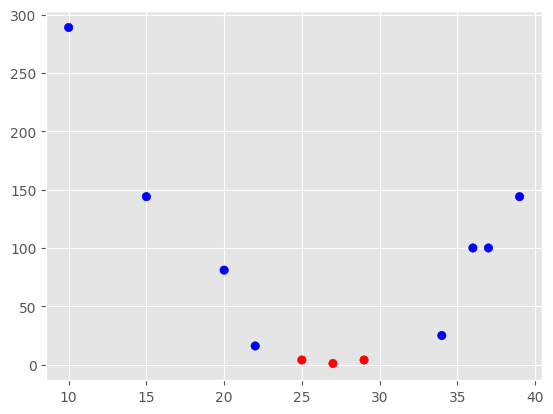

In [ ]:
plt.scatter(x[:,1], newx, c=['r' if i<10 else 'b' for i in newx])
plt.show()

さらに脱線ついでに、mathplotlib scatterの新しい機能を利用するならこういう書き方になるが、legendが必要ない場合は逆に面倒

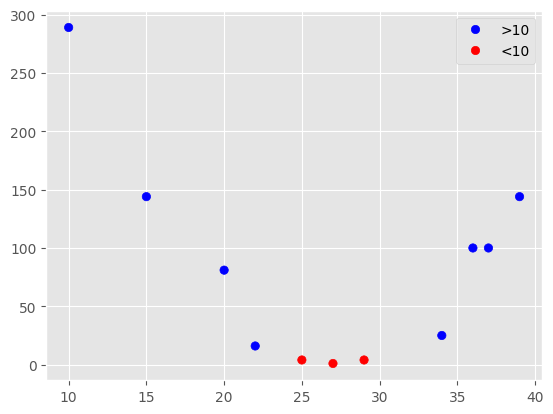

In [ ]:
from matplotlib.colors import ListedColormap
scatter = plt.scatter(x[:,1], newx, c=[newx<10], cmap=ListedColormap(['b', 'r']))
plt.legend(handles=scatter.legend_elements()[0], labels=['>10','<10'])
plt.show()

では、そのような都合の良い関数をどのように見つけるのか
- 実は、見つけるのではなく、作ってしまうと考えた方が良い

まず、基本となる**データを高次元の特徴空間上へ写像する**という考えを数式化する
- ここで、与えられたデータが構成する**入力空間**を高次元化するために利用する空間を**高次元特徴空間**と呼ぶ
- この$n$次元入力空間を$r(r>n)$次元高次元特徴空間に変換する関数を次のように定義する
$$
\psi(X) = (\varphi_1(X), \varphi_2(X), \varphi_3(X), \cdots,\varphi(X))
$$
理論的・理想的には、1次元拡張すれば、どのような分離も必ず分離調平面一つで分離可能となる

先に示した、
$$
max\Bigl\{{\tilde{L}(\alpha) = \sum_{i=1}^{N}\alpha_i - \frac{1}{2}\sum_{i=1}^{N}\sum_{i=j}^{N}\alpha_i \alpha_jt_it_j{X_i}^TX_j\Bigr\}}\\
\sum_{i=1}^{N}\alpha_it_i = 0, \quad 0 \leqq \alpha_i \leqq C, i = 1,2,...N
$$
について、高次元特徴空間に写像すると、
$$
max\Bigl\{{\tilde{L}(\alpha) = \sum_{i=1}^{N}\alpha_i - \frac{1}{2}\sum_{i=1}^{N}\sum_{i=j}^{N}\alpha_i\alpha_jt_it_j{\psi(X)_i}^T\psi(X)_j\Bigr\}}\\
\sum_{i=1}^{N}\alpha_it_i = 0, \quad 0 \leqq \alpha_i \leqq C, i = 1,2,...N
$$
となる

ここで、カーネル関数$K$を

$$K(X_i, X_j) = {\psi(X)_i}^T\psi(X)_j$$

とする

この$\psi(X)$を直接計算せずに内積を計算できるような$K$が容易に得られればよく、このような$K$を用いた手法を**カーネルトリック**と呼ぶ
- この辺りの中二病感満載のネーミングセンスは嫌いではない

具体的には、次のようなカーネル関数が用いられる

**ガウスカーネル**
$$
K(X_i, X_j) = exp\left(-\frac{||X_i -X_j||^2}{2σ^2}\right)
$$

**多項式カーネル**
$$
K(X_i, X_j) = (X_i^TX_j + c)^d
$$

**シグモイドカーネル**
$$
K(X_i, X_j) = tanh(bX_i^TX_j + c)
$$

実際の計算は煩雑であるため割愛するが、これらは全てシンプルな計算で先ほどの内積を得ることができる


では、よくあるアイリス(アヤメ)の種別分けを行う学習データを用いて、カーネル関数の効果を確認する

**Iris (アヤメの計測データ、通称：アイリス)**

“setosa”, “versicolor”, “virginica” という 3 種類の品種のアヤメのがく片 (Sepal)、花弁 (Petal) の幅および長さを計測したデータ

| | |
|:-:|:-:|
| レコード数 | 150 |
| カラム数 | 4 |
| 主な用途 | 分類 (Classification) |

各カラムの構成

| | |
|:-:|:--|
|sepal length (cm)|	がく片の長さ|
|sepal width (cm)|	がく片の幅|
|petal length (cm)|	花弁の長さ|
|petal width (cm)|	花弁の幅|

irisの分類として、ここでは一般的に利用され、かつ効果を視覚的に確認しやすいガウスカーネルを用いる

次の例では、2つの$C$と2つの$\gamma$を想定し、全ての組み合わせを試している。すべての組み合わせは、product関数を用いて生成している
- なお、productはitertoolsと呼ばれる効率的なループ実行となめのイテレータ生成関数の一つであり、階差数列的なイテレータ、決められたループをめぐるイテレータ、順列や組み合わせによるイテレータなど、様々なイテレータを構成できる(https://docs.python.org/ja/3/library/itertools.html)
- productは入れ子構造を持つforループを記述したのと同じ効果がある

まず、コストパラメータは、ガウスカーネルに関わらず存在し、$C$が小さいほど誤分類を許容し、よりソフトマージンとなるように超平面を決定する

次に、$\gamma$は、ガウスカーネルの式を次のように記述しなおした時の$\gamma$を表し、値が小さいほど単純な決定境界となり、大きいほど複雑な決定境界となるが、あまりにも大きな値では過学習気味になる

$$
K(X_i, X_j) = exp\left(-\frac{||X_i -X_j||^2}{2σ^2}\right)\\
=exp\left(-\gamma||X_i -X_j||^2\right)
$$

横軸と縦軸は用いた2つの特徴量を表す
- コストパラメータ$C$が小さいときは決定領域の中に多くの誤分類点を含み、$C$が大きいときは誤分類点が少ないことがわかる
- さらに、$\gamma$が小さいときの決定境界は単純な直線で構成された決定境界が記述されているが、$\gamma$が大きい場合は複雑な形となる
  - より極端な$\gamma$を与えると、各点毎に丸い境界が現れる

おおよそ感覚で何をしているのかがつかめたのではないかと思うが、ガウスカーネルでは、ガウス分布を当てはめることで選びたい点が集まっているところとその周辺が特徴として表れるようにし、その後改めてリニアSVMで分類しているとわかる

なお、今回は乱数に種(seed)を与えていないので、各々異なる結果になる点に注意すること



[SVC(C=0.03125, gamma=3.0517578125e-05), SVC(C=0.03125, gamma=8), SVC(C=32768, gamma=3.0517578125e-05), SVC(C=32768, gamma=8)]


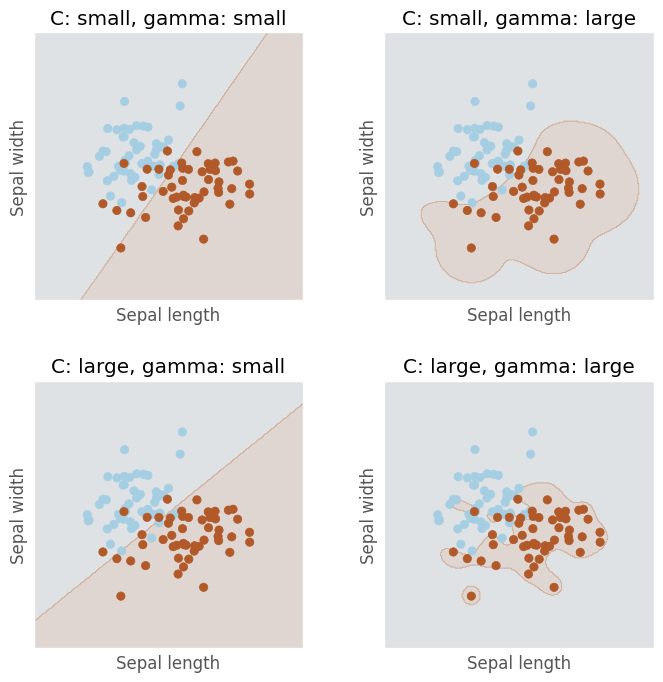

In [ ]:
from sklearn import svm, datasets
import matplotlib.pyplot as plt
from itertools import product
iris = datasets.load_iris()
#特徴量は最初の2つかつデータも100個のみ使う
X = iris.data[:100, :2]
#オリジナルデータはかなり正確に分けることができるため、あえて特徴量にノイズを加える
E = np.random.uniform(0, 1.0, size=np.shape(X))
X += E
y = iris.target[:100]
#meshのステップサイズ
h = 0.02
#コストパラメータ
Cs = [2 ** -5, 2 ** 15]
#RBFカーネルのパラメータ
gammas = [2 ** -15, 2 ** 3]
#product関数は、全ての組み合わせを求める関数である
svms = [svm.SVC(C=C, gamma=gamma).fit(X, y) for C, gamma in product(Cs, gammas)]
#生成した4つのSVCのそれぞれのパラメタを確認する
print(svms)
titles = ["C: small, gamma: small", "C: small, gamma: large",
  "C: large, gamma: small", "C: large, gamma: large"]
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
plt.figure(figsize=(8, 8), dpi=100)
for i, clf in enumerate(svms):
  plt.subplot(2, 2, i + 1)
  plt.subplots_adjust(wspace=0.3, hspace=0.3)
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.1)
  plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
  plt.xlabel("Sepal length")
  plt.ylabel("Sepal width")
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  plt.xticks(())
  plt.yticks(())
  plt.title(titles[i])
plt.show()

テストデータの分割とは異なるが、グリッドサーチについてもここで簡単に触れておく
- グリッドサーチは指定した**ハイパーパラメータ**の全ての組み合わせに対して学習を行い、もっとも良い精度を示したパラメータを採用する方法である
- Scikit-learnにはGridSearchCVが提供されている

GridSearchCVはPythonのディクショナリでパラメータの探索リストを渡すと全部試行しスコアを返すことができる
- 以下、簡単に動作を確認するが、既に学んだ内容を多く含むので、一気に混同行列を求めるところまで進める
- 途中結果が次々表示され、解析におよそ1分弱かかる

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix
### 探索するパラメータ空間の一覧をnumpyの機能で指定
def param():
  ret = {
    'C':[1, 10, 100],
    'kernel':['rbf', 'linear', 'poly'],
    'degree':np.arange(1, 6, 1),
    'gamma':np.linspace(0.01, 1.0, 50)
  }
  return ret
# データ準備、ここではirisデータを用いる
x = load_iris().data
y = load_iris().target
# データを分割
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
# GridSearchCVのインスタンスを作成しつつ学習させる
gscv = GridSearchCV(SVC(), param(), cv=4)
gscv.fit(x_train, y_train)
# スコア一覧を取得する
gs_result = pd.DataFrame.from_dict(gscv.cv_results_)
gs_result.to_csv('gs_result.csv')

大量にログが出力されたが、その結果はgs_result.csvというファイルに保存されており、右のメニューからファイルタブを選ぶとそのファイルの存在が確認できるはずである
- ダブルクリックすると中身を見ることができる
- このファイルも2250行存在するため、見たところで何がうれしいということもないが、このように様々なハイパーパラメータを一気に試すことができる

最高性能をたたき出したモデルを取得し、テストデータを分類してみる

In [ ]:
best = gscv.best_estimator_
pred = best.predict(x_test)
# 混同行列を出力
confusion_matrix(y_test, pred)

array([[12,  0,  0],
       [ 0, 13,  1],
       [ 0,  0, 12]])

これぐらいお手軽にハイパーパラメータチューニングができるなら、パラメータチューニングが面倒だというデメリットはあまり気にならないんじゃない？という考えも誤りではない

# 決定木



## ランダムフォレストの基本である決定木

決定木とは、木構造により細分化して判断するモデルである
- 例えば、動植物の分類は決定木の一つといえる

いきなりだが、次のコードを用いて実際に動かしてみる
- ここでは、物件選びを想定する

dataは、様々な条件を持つ物件で、ある人が借りたいか、借りたくないかを選んだ表である
- "buy"はTrueが借りる、Falseが借りないを意味し、これが目的変数であり他は説明変数となる
- "high"は部屋の階数を表す
- "size"は部屋の広さを表す
- "autolock"はオートロックがついているかどうかを表し、1がついていることを、0がついていないことを意味する




In [ ]:
import pandas as pd
data = pd.DataFrame({
        "buy(y)":[True,True,True,True,True,True,True,False,False,False,False,False,False],
        "high":[4, 5, 3, 1, 6, 3, 4, 1, 2, 1, 1,1,3],
        "size":[30, 45, 32, 20, 35, 40, 38, 20, 18, 20, 22,24,25],
        "autolock":[1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,1,0]
    })
data

,buy(y),high,size,autolock
0,True,4,30,1
1,True,5,45,0
2,True,3,32,1
3,True,1,20,1
4,True,6,35,1
5,True,3,40,1
6,True,4,38,1
7,False,1,20,0
8,False,2,18,0
9,False,1,20,0


このテーブルから、実際に特徴量$X$と教師ラベル$y$を作成する

なお、pandasでは位置の指定方法として、
- at, loc : 行名（行ラベル）、列名（列ラベル）
- iat, iloc : 行番号、列番号
がある

In [ ]:
y = data.loc[:,["buy(y)"]]
X = data.loc[:,["high", "size","autolock"]]
print(y)
print(X)

    buy(y)
0     True
1     True
2     True
3     True
4     True
5     True
6     True
7    False
8    False
9    False
10   False
11   False
12   False
    high  size  autolock
0      4    30         1
1      5    45         0
2      3    32         1
3      1    20         1
4      6    35         1
5      3    40         1
6      4    38         1
7      1    20         0
8      2    18         0
9      1    20         0
10     1    22         0
11     1    24         1
12     3    25         0


さて、これをもとに分類して判断しようとするのは、分かりやすい発想であり、例えば、次の方針は腑に落ちるであろう

<img src='http://class.west.sd.keio.ac.jp/dataai/text/tree1.png' width='40%'>

このような判断手法を*決定木*と呼び、基本は2分岐・2分木となる

各項目をどの順番に選ぶのかが重要となるが、感覚としては**なるべく純粋に(混じりけなく)選択できる項目をトップにもっていきたい**と思うであろう

純粋とは、分岐した先で同じ項目がまた分岐に使われるのは避けたい、ということであり、また存在したとしてもなるべくどちらかに偏っているようにしたいということである



## 不純度

**不純度**はデータがどれだけばらついているかを表す指標ともいえる

完全に分類できれば不純度0となり、回帰では１つのノード内でデータの分散が0であれば不純度0となる

不純度として使える指標はいくつかあり、一般に用いられるのが、**エントロピー**と**ジニ係数**である


### エントロピー

エントロピーは情報量を平均化した指標であり、情報量のばらつき具合を示し、稀に起こる事象ほどエントロピーは大きく、情報として有用と判断される

$$
H = \sum_{i=1}P(x_i)I(x_i) = -\sum_{i=1}P(x_i)\log_{2}P(x_i)
$$

ここで、$H$はエントロピー、$I(x_i)$はある事象$x_i$に対する情報量を指す

例えば
- 沖縄で晴れの確率を0.8、曇りの確率を0.05、雨の確率を0.15とする
  - 沖縄の天気のエントロピー：0.884
- 関東で晴れの確率を0.6、曇りの確率が0.20、雨の確率が0.20とする
  - 関東の天気のエントロピー：0.953

つまり、関東の天気のエントロピーはより値が大きく、ばらつきが大きいといえる

不純度の定義に従えば、その最低値はエントロピーも0となり、不純度の高くなるほどエントロピーは大きくなる
- 不純度もエントロピーもばらつき具合を示す指標であり不純度として利用できるであろう

決定木では、分岐前と後のエントロピーを計算し、上層の分岐より下層の分岐の方がよりエントロピーが小さくなる、つまりその差が最大となる分岐条件を探すことでモデルを構築する

### ジニ係数

ジニ係数は誤分類する確率を平均化した指標であり、誤分類をどの程度しそうかの指標である

あるノード$t$においてクラス$x_i$が選ばれる確率を$P(x_i \mid t)$とすると、ジニ計数$G$は、クラス数$K$とすると、次のように表現できる

$$
G(t) = \sum_{i=1}^{K}P(x_i \mid t)\left(1-P(x_i \mid t)\right) = 1-\sum_{i=1}^{K}P(x_i \mid t)^2
$$

不純度の定義にに従えば、その最低値はジニ係数も0、不純度が高くなるほどジニ係数は大きくなる
- ジニ係数を用いて不純度を計算することができるといえ、エントロピー同様、モデルが構築できる

## モデル構築

さて、実際にモデルを構築しよう

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_graphviz
#下記は決定木可視化のためのツール
import graphviz
import pydotplus
from IPython.display import Image
from six import StringIO # 新しいバージョンのScikit-learn
#from sklearn.externals.six import StringIO # 古いバージョンのScikit-learn

先のデータを使ってモデルを構築する\
いとも簡単にあっさりと終る

In [ ]:
clf = DecisionTreeClassifier()
clf = clf.fit(X, y)

一応確認するが、正答率は100%、Accuracyは1.0である

In [ ]:
print(clf.predict(X).tolist())

[True, True, True, True, True, True, True, False, False, False, False, False, False]


モデルを可視化する

決定木の利点の一つが可視化した際のわかりやすさにある

[False  True]


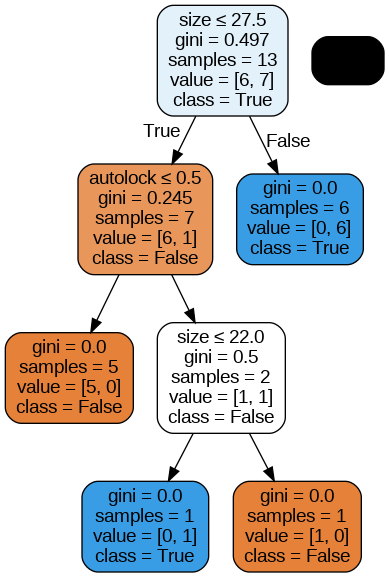

In [ ]:
dot_data = StringIO() #dotファイル情報の格納先
export_graphviz(clf, out_file=dot_data,
  feature_names=["high", "size","autolock"],# 特徴量の名称
  class_names=["False","True"],# 分類名、print(clf.classes_)の結果の通りにいれる
  filled=True, rounded=True,
  special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
print(clf.classes_) #この結果が[False True]であるため、class_namesもこれに揃える
Image(graph.create_png())

### 分岐の見方

可視化の際には、どの特徴量で可視化するのか、またクラスはどの順番で記述するのかといった情報が必要となる

ここでは、
`feature_names=["high", "size","autolock"]`
として利用したすべての特徴量について可視化し、そのクラスの順序は、
`print(clf.classes_)`
として得られた結果を用いる

上から順番に説明する

---
**最上位(Root)ノード(gini=0.497)**

---
- 次の分岐条件：部屋の大きさ$size \leq 27.5$ という条件で次の分岐が行われ、Trueの場合左、Falseの場合右に分岐、以下同様
- gini係数：0.497
- sample(推定された所属サンプル数)：13
- value：正解ラベルが6個と7個で構成されていることを示す
  - ややこしいがこの場合valueは$[False:True]$であり、`clf.classes_`の結果に従うこと
  - 実際に予測による分類は次の層の分岐ノードの数でわかり、この場合$size \leq 27.5(True) : size \gt 27.5(False) =7:6$に分類されている
    - 先走って説明すれば、分類は1つここには含まれておらず(下の層で正しく分類できている可能性もあるため、失敗しているわけではない)、False側つまり、$size \gt 27.5$に所属した6件は全て正解している
- class：Leafの場合は予測されたクラス
  - Leafでない場合は所属する支配的なクラス分類(数の多い方)が示され、同数の場合優先されるラベルが記される
  - ここではRootは6:7でTrue(借りる)が支配的
---
**第2層(gini=0.245)**

---
- Rootノードの分岐で$size \leq 27.5$に該当
- 次の分岐条件は、$autolock = 0$である(autolockはTrueかFalseであるため)
- gini係数：0
- sample(推定された所属サンプル数)：7
- value：正解ラベルは$[6,1]$である
- class：False(借りない)が支配的
---
**第2層(gini=0)**

---
- Rootノードの分岐で$size \gt 27.5$に該当
- 次の分岐条件の記載がないためLeafノードである
- gini係数0
- sample(推定された所属サンプル数)：6
- value：実際の正解ラベルは全てTrueで6個所属しているため、分類されたサンプルはすべて正解
- class：LeafでありＴrue(借りる)と推定
---
以下同様で、valueの片方が0となっているのがリーフに相当し末端となる
---

- Rootが部屋の広さで分類され、かつジニ係数が最も大きいため、部屋の広さが一番重要であったとわかる


autolockのように0,1の2値設定した場合は、分岐条件が0.5を境界として分類されている
- 具体的には、0.5以上が1でオートロック有、0.5未満が0でオートロック無を表す



### 推論
この予測モデルを使って、別物件データについて借りるか借りないかを予測する

次の2つのデータを用いる

In [ ]:
z = pd.DataFrame({
        "high":[2, 3],
        "size":[25, 28],
        "autolock":[1,0]
    })
z2 = z[["high", "size","autolock"]].values

予測を立てるにはpredict関数を呼び出すのがscikit-learnのやり方

In [ ]:
y_est = clf.predict(z2)
y_est

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([False,  True])

2つの物件について予測結果はFalse, Trueとなり、借りない、借りるという結果になった


### 問題点

このような決定木は過学習となるため実応用ではほぼ利用されない
- 与えられたデータを全て分類しきるため、例えば、説明変数の表現空間上で近い場所にあるデータに対して、本来であればエラーであるとして曖昧に境界を引きたいところが、これらを全て区別することになる
- SVMにおいて、$C$や$\gamma$をとてつもなく大きな値にしたようなイメージである

しかしながら、このような決定木をうまく利用するのが、次の王道ランダムフォレストである

# ランダムフォレスト

ランダムフォレストは、簡単に言えば、大量にシンプルかつ乱雑な決定木を作成し、その大勢を用いて判断するモデルに基づく分類手法である
- この基本となる**大勢を用いて判断する**という部分を理解するために、アンサンブル学習について触れる
- アンサンブル学習はランダムフォレスト以外でも、複数の学習モデルを組み合わせるときの考え方として応用されている

## アンサンブル学習

アンサンブル学習には主に**バギング**という手法と**ブースティング**という手法がある

ランダムフォレストはバギングをベースに予測を行う

### バギング (Bagging)

元データから一部のデータを**復元抽出**により、リサンプリングする手法をブートストラップと呼び、重複してサンプリングすることを許す(ブートストラップサンプリング)

- ブートストラップは、データベースからサンプリングしては戻し、サンプリングしては戻す復元抽出をして、たくさんのサンプルを作り出す方法

バンキングとは**ブーストラップ**を用いて複数のモデルである弱学習機を作成、並列的に学習させる方法であり、新しい入力データに対して分類として多数決を用い、回帰として平均を予測に用いる

- ランダムフォレストはバギングを利用

### ブースティング (Boosting)
複数モデルについて学習を直列に進める手法で、前のモデルの結果を参考にして次のモデルを構築する

- バギングのように弱学習器を独立に作らず、k 個目に作った弱学習器をもとに(弱点を補うように)k+1 個目の弱学習器を構成するといった、順番に弱学習器を構成する手法
- LightGBMはブースティングを利用

## スタッキング (Stacking)

複数の学習器を利用し、データを積み上げて精度を上げる手法であり、二段階以上の段階を踏みながらデータを積み上げる。大まかな流れは次の通り。
- 第1段階として、学習器に複数のモデルを用意する。これらのモデルはバラバラでよい。
- より多様なモデルを準備した方が精度が向上する傾向にある。
- これらのモデルそれぞれから予測値を出力させる。
- 第2段階として予測値をまとめたメタモデルを作成する。
- メタモデルから最終予測値を作成する。
- メタモデルをさらに積み上げて第3段階以降を構築する場合もある。

スタッキングにより様々なモデルやアルゴリズムを利用して結果を獲得するため、場合に応じて出力される予測値を選択できることから、精度向上を狙える。

一方で、設計が煩雑になり、計算コストも増大する。また、スタッキングを用いたからと言って、必ずしも精度の良い結果になるとは限らない。

スタッキングは、Kaggleなどで上位を狙う場合の常套手段として利用されていることからも、精度向上に対して有効な手段として認識されている。

## ランダムフォレストの考え方

ランダムフォレストはアンサンブル学習のバギングをベースに、少しずつ異なる決定木をたくさん集めることで、決定木単体で用いた場合に陥る過学習の問題に対応した手法である
- ランダムフォレストは、バギングの欠点を補うため、説明変数を一部しか使わず、決定木の深さも最初から制限している

元のデータからランダムに何グループかサンプリングした場合、各決定木はそれぞれのデータを過学習した状態で構築されるが、異なった方向に過学習した決定木を数多く作成し、それらの結果の平均を取れば過学習の度合いを削減できるであろう、という考え方に基づく

その処理の過程は次の通りである
1. 元データからランダムにデータをブーストラップでサンプリングし、$N$グループ分のデータ群を作成する
この時特徴量もランダムに選択される
1. $N$グループそれぞれで決定木モデルを作成する
1. $N$グループそれぞれの決定木モデルで予測を行う
1. $N$グループの多数決もしくは平均を求め、最終予測を行う

<img src="http://class.west.sd.keio.ac.jp/dataai/text/RF1.png" width="70%">

ランダムフォレストはアンサンブル学習を用いてはいるが、手法は決定木のみで、利用するデータセットが異なる

## ランダムフォレストのパラメータ

まず、先に述べた通り、ランダムフォレストはパラメータチューニングを行わなくても比較的良い精度が出せることが知られている

次のようなハイパーパラメータが存在する


### `n_estimators`
いくつの決定木を用意するかを設定し、先の$N$個のデータ$N$に相当する
- より大きい数の方が、多数決を取る際により一般的に議論できると考えられるためよいといえるが、計算コストが増大するためトレードオフがある

### `max_features`

特徴量の選択もランダムに行われるが、この時の各グループが用いる特徴量の個数を指定する
- `max_features`を`n_features`とすると全特徴量を選択することを意味するが、このような大きな値にすればするほど、各決定木モデル間の差がなくなることを意味する
- 逆に小さくすると各決定木モデル間の差異は広がるが、与えられたデータの特徴をうまく捉えていない決定木ばかりできることとなる

## ブートストラップサンプリング
$N$ 個の訓練用の標本 $\{\boldsymbol{x}_i, y_i\}_{i=1}^N$ から重複を許してランダムに$N$個を選択する手法であることは説明した
- このとき、ランダムに選択するために中には選ばれないデータも存在し、これをOOB(Out-Of-Bag)と呼ぶ
- このデータは、ランダムフォレストのエラーの評価に利用する手法も提案されている

以下、簡単に説明する

$i$番目のデータ$ ( \boldsymbol{x}_i, y_i )$について、$M$個の標本セットのうち、幾つかの木では利用されていないデータであるとする
- 使われなかった木を集めて部分木を構成し、それで精度を評価するのが、OOB誤り率と呼ばれる手法である
- このOOBがどれくらいの量になるかというと、およそ36%となり、この数字は理論的に説明可能である

あるサンプル$\boldsymbol{x}_i$が選ばれない確率は、データが全$N$個あることから、
$$
{ N-1 \over N}
$$
となる

$N$個の標本を選ぶので、これを$N$乗する
$$
\left( { N-1 \over N} \right)^{N} = \left( 1-{ 1 \over N} \right)^{N}
$$

$$
\lim_{N \to \inf}\left( { N-1 \over N} \right)^{N} = e^{-1}\\
\because \left( { N-1 \over N} \right)^{N} = \left( { t \over t+1} \right)^{t+1} = \left( { t+1 \over t} \right)^{-(t+1)} = \left( 1 + { 1 \over t} \right)^{-(t+1)} = \left( \left( 1 + { 1 \over t} \right)^{t+1} \right)^{-1}
$$

となり、理論的に約36%であることが示される

## なぜランダムフォレストはアンサンブル学習で精度があがるのか？

ランダムフォレストを含む決定木のような弱学習器は集団学習に向いており、このことはバイアスーバリアンスの観点から説明できる

- バイアスーバリアンス理論では、汎化誤差は次のように分解される

 **汎化誤差 = バイアス + バリアンス ＋ ノイズ**

  - ここでバイアスは モデルの表現力に由来する誤差、
  - バリアンスは データセットの選び方 に由来する誤差、
  - ノイズは 本質的に減らせない誤差を表す

- 決定木は学習データからうける影響が大きいためバリアンスが高い学習モデルであり、ランダムフォレストなどの集団学習アルゴリズムは、このバリアンスを低減させることで 精度を向上させる
- SVMはそれ自体が低バリアンスなモデルであるため、集団学習のメリットを享受しにくいといえる

興味があれば、実際にSVMをアンサンブル学習させた場合と比較するのもよいであろう

## ランダムフォレストの実際

### データセット
今回はより実践的にkaggleのKickstarter Projectsのデータセットを利用する

https://www.kaggle.com/kemical/kickstarter-projects

あまり重要ではないが、このデータセットについて概説する

- KickstarterProjectsデータセットはクラウドファンディングの愛好家が、Kickstarterという著名なクラウドファンディングサイトの過去のデータを集めたデータが元になっている
- このデータを用い、例えば提出された案件が成功するか失敗するかを予測する問題である
- 取得された期限の違う2種類のデータが提供されているが、今回は新しい2018年データセットを利用する

 データ変数は以下の通りである
 - ID：クラウドファンディングの個別ID
 - name：クラウドファンディングの名前
 - category：詳細なカテゴリー
 - main_category：大まかなカテゴリー
 - currency ：使用された通貨
 - deadline：締め切り日時
 - goal：目標調達資金額
 - launched：開始した日時
 - pledged：集まった資金
 - state：プロジェクトの状態(成功、失敗、キャンセルなど)
 - backers：集まった支援者
 - country：プロジェクトが開かれた国
 - usd pledged： 集まった資金の米ドル換算(KSによる変換)
 - usd_pledged_real： 集まった資金の米ドル換算(fixer.ioによる変換)
 - usd_goal_real：目標調達資金額の米ドル換算

つまり、目的変数は「state」で説明変数がその他すべてとなる

改めて学ぶが、データには欠損値が存在する
- データ数が十分あるため、今回は欠損値を含むデータを削除して扱う

### 事前準備とデータのダウンロード
データを読み込み、内容を確認する

本来KaggleのデータはKaggleのアカウントが必要であるため、まずはKaggleのアカウントを取得すること
- ここでは、keio.jpアカウントを用いているという制限において、授業のBoxから取得し、ファイルフォルダにドラッグして利用する

手持ちデータに対するデータをアップロードする手順は次の通りである
1. Kaggleアカウントを作成してKickstarter Projectsに移動する
1. データをダウンロードする
1. ks-projects-201801.csv をダウンロードしてPCに保存する
1. 保存したファイルをGoogle Colaboratoryの左のフォルダアイコンを押し、**sample_data**と表示されているホームディレクトリにドラッグする
  - この時、「アップロードしたファイルはランタイムのリサイクル時に削除されます」と表示される通り、仮想マシンを実行する度にファイルが削除されるため都度アップロードが必要となる

ガイダンスでは、google driveからwgetでデータをダウンロードしたが、今回はbox.comからwgetを用いてコマンドでデータを取得する
- box.comの授業のフォルダ Assets -> Dataset にデータを格納してある
- なお、一般に公開されている場合は、既に説明済みだが、
```
!wget -O 保存ファイル名 URL
```
とすれば仮想マシンへのダウンロードが完了する



In [ ]:
import os
if not os.path.exists('ks-projects-201801.csv'):
  #!wget "https://drive.google.com/uc?export=download&id=1OmT_UjbhYKb7EUPW_s3O-h3ZLW42kxZc" -O ks-projects-201801.csv
  !wget https://keio.box.com/shared/static/5c4qzsxzfbmx2jdjrp2r9qyfj90gb9wb -O ks-projects-201801.csv

--2023-08-14 18:48:47--  https://keio.box.com/shared/static/5c4qzsxzfbmx2jdjrp2r9qyfj90gb9wb
Resolving keio.box.com (keio.box.com)... 74.112.186.144
Connecting to keio.box.com (keio.box.com)|74.112.186.144|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /public/static/5c4qzsxzfbmx2jdjrp2r9qyfj90gb9wb [following]
--2023-08-14 18:48:47--  https://keio.box.com/public/static/5c4qzsxzfbmx2jdjrp2r9qyfj90gb9wb
Reusing existing connection to keio.box.com:443.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://keio.app.box.com/public/static/5c4qzsxzfbmx2jdjrp2r9qyfj90gb9wb [following]
--2023-08-14 18:48:47--  https://keio.app.box.com/public/static/5c4qzsxzfbmx2jdjrp2r9qyfj90gb9wb
Resolving keio.app.box.com (keio.app.box.com)... 74.112.186.144
Connecting to keio.app.box.com (keio.app.box.com)|74.112.186.144|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://public.boxcloud.com/d/1/b1!Gilsz

In [ ]:
import pandas as pd #pandasのインポート
import datetime #元データの日付処理のためにインポート
from sklearn.model_selection import train_test_split #データ分割用
from sklearn.ensemble import RandomForestClassifier #ランダムフォレスト

### データの読み込み

pandasのcsv読み込み機能を用いて読み込む
- ただし、pythonの型にうるさい問題で、データがまともに読めない場合がある
- 型にうるさいのはプログラマに優しいという謎な常識はそろそろやめにして頂きたいものだ
  - 型を間違えるプログラマが悪いのではない、型を自由に変換できないインタプリタ側がタコなのだ

さて、普通は
```
df = pd.read_csv("ks-projects-201801.csv")
```
でよい

しかし文字コードなどの問題によりエラーになる場合があり、この場合は、なんと、エラーを無視して読み込めという指定をする必要がある
- もう意味が分からない、警告ならまだしも、そういうエラーに存在意味があるのか？
- 実際、今回のケースはエラーになり、エラーを解除して読み込む


In [ ]:
import codecs
with codecs.open("ks-projects-201801.csv", "r", "Shift-JIS", "ignore") as file:
  df = pd.read_table(file, delimiter=",")
  print(df)

                ID                                               name  \
0       1000002330                    The Songs of Adelaide & Abullah   
1       1000003930      Greeting From Earth: ZGAC Arts Capsule For ET   
2       1000004038                                     Where is Hank?   
3       1000007540  ToshiCapital Rekordz Needs Help to Complete Album   
4       1000011046  Community Film Project: The Art of Neighborhoo...   
...            ...                                                ...   
378483   999976400  ChknTruk Nationwide Charity Drive 2014 (Canceled)   
378484   999977640                                          The Tribe   
378485   999986353  Walls of Remedy- New lesbian Romantic Comedy f...   
378486   999987933                           BioDefense Education Kit   
378487   999988282                  Nou Renmen Ayiti!  We Love Haiti!   

               category main_category currency    deadline   goal  \
0                Poetry    Publishing      GBP   2015/

<ipython-input-95-edb188c1fe37>:3: DtypeWarning: Columns (12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_table(file, delimiter=",")


データの形を確認する(378488, 17)などと表示されていれば正しく読み込めている

In [ ]:
df.shape

(378488, 17)

一応、最初の数行だけでも中身を確認する
- 特にエラーを解除したため、確認は重要である

中身を見ると、上記の項目が入力されていることがわかる
- なお、NaNはデータが入っていない項目であり、データとしては問題ではない
- 後ほど、このエントリを削除することとする

In [ ]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,Unnamed: 15,Unnamed: 16
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015/10/9,1000,2015/8/11 12:12,0,failed,0,GB,0.0,0.0,1533.95,NaN,NaN
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017/11/1,30000,2017/9/2 4:43,2421,failed,15,US,100.0,2421.0,30000.00,NaN,NaN
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013/2/26,45000,2013/1/12 0:20,220,failed,3,US,220.0,220.0,45000.00,NaN,NaN
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012/4/16,5000,2012/3/17 3:24,1,failed,1,US,1.0,1.0,5000.00,NaN,NaN
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015/8/29,19500,2015/7/4 8:35,1283,canceled,14,US,1283.0,1283.0,19500.00,NaN,NaN


### データの成形

募集日数について考えよう

クラウドファンディングの成功・失敗に募集開始時期が大きな意味合いを持つと思うだろうか？
- このあたりの特徴量操作の感覚がデータサイエンスでは重要である

もちろん、株価が大幅に上昇し、多くの人がお金を儲けて、クラウドファンディングにも大量にお金を投入するようなことがあるかもしれないが、その傾向は比較的長期に及ぶと考えられ、1年といった期間で大きく動くことは稀であろう
- それよりも、応募期間の方が成功・失敗に関係すると考えるのが常識的であろう
- そう考えるならば、クラウドファンディングの**募集開始時期**と**終了時期**の情報から、**募集日数**の情報に変換する必要がある

さて、変換するのだが、ここで再びpythonいや、pandasの問題かもしれないが、つまらない文句を言う

本来は、
```
df['deadline'] = pd.to_datetime(df["deadline"])
```
などとすれば問題なくデータを読み込むが、日付として認識できない文字列などが入っているエラーとなる
- たとえば、実データでよくあるケースとして、日付の間にハイフン(-)が入っているともうダメで、それくらいなんとかしろといいたくなる

それで対応はというと、またしてもエラーを無視するオプションを付けると読み込んでくれる
- だったら、初めから警告ぐらいにして読みこめよといいたい


In [ ]:
df["deadline"] = pd.to_datetime(df["deadline"], errors="coerce")
df["launched"] = pd.to_datetime(df["launched"], errors="coerce")
df["days"] = (df["deadline"] - df["launched"]).dt.days

内容を確認してみる

In [ ]:
df["days"]

0         58.0
1         59.0
2         44.0
3         29.0
4         55.0
          ... 
378483    29.0
378484    26.0
378485    45.0
378486    30.0
378487    27.0
Name: days, Length: 378488, dtype: float64

### データサイズの削減

なお、このままではデータが大きすぎて処理できないので、行数を削減する

Colaboratoryの仮想マシンが搭載しているメモリ量は決して多くなく、どちらかというと心もとない程度しかないため、30万を超える元データを全て扱うことは無謀である\
そこで、5万ぐらいにデータを削減する

AIを流行らせているのは、Intelやら、nVidiaなどの、ハードウェアメーカで、高く収益率の高いハードウェアを買わせるためにあるという意見もあるぐらいである

In [ ]:
df = df[:50000]

### 目的変数

目的変数stateには様々な情報が含まれており、今回用いるのは成功(successful)と失敗(failed)のみである
- これらだけを含むように加工し、加工結果を確認する
- failedが多いため、successfulが正しく変換できているかを確認できるよう、多めに表示させている

In [ ]:
df = df[(df["state"] == "successful") | (df["state"] == "failed")]
df.head(10)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,Unnamed: 15,Unnamed: 16,days
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000,2015-08-11 12:12:00,0,failed,0,GB,0.0,0.0,1533.95,NaN,NaN,58.0
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000,2017-09-02 04:43:00,2421,failed,15,US,100.0,2421.0,30000.00,NaN,NaN,59.0
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000,2013-01-12 00:20:00,220,failed,3,US,220.0,220.0,45000.00,NaN,NaN,44.0
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000,2012-03-17 03:24:00,1,failed,1,US,1.0,1.0,5000.00,NaN,NaN,29.0
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000,2016-02-26 13:38:00,52375,successful,224,US,52375.0,52375.0,50000.00,NaN,NaN,34.0
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000,2014-12-01 18:30:00,1205,successful,16,US,1205.0,1205.0,1000.00,NaN,NaN,19.0
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000,2016-02-01 20:05:00,453,failed,40,US,453.0,453.0,25000.00,NaN,NaN,44.0
10,100004721,Of Jesus and Madmen,Nonfiction,Publishing,CAD,2013-10-09,2500,2013-09-09 18:19:00,0,failed,0,CA,0.0,0.0,2406.39,NaN,NaN,29.0
11,100005484,Lisa Lim New CD!,Indie Rock,Music,USD,2013-04-08,12500,2013-03-09 06:42:00,12700,successful,100,US,12700.0,12700.0,12500.00,NaN,NaN,29.0
12,1000055792,The Cottage Market,Crafts,Crafts,USD,2014-10-02,5000,2014-09-02 17:11:00,0,failed,0,US,0.0,0.0,5000.00,NaN,NaN,29.0


さらに、failedやsccessfulでは扱いにくいため、failedを0、successfulを1に変換する

In [ ]:
df["state"] = df["state"].replace("failed",0)
df["state"] = df["state"].replace("successful",1)
df.head(10)

<ipython-input-102-4a444b4da45b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["state"] = df["state"].replace("failed",0)
<ipython-input-102-4a444b4da45b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["state"] = df["state"].replace("successful",1)


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,Unnamed: 15,Unnamed: 16,days
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000,2015-08-11 12:12:00,0,0,0,GB,0.0,0.0,1533.95,NaN,NaN,58.0
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000,2017-09-02 04:43:00,2421,0,15,US,100.0,2421.0,30000.00,NaN,NaN,59.0
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000,2013-01-12 00:20:00,220,0,3,US,220.0,220.0,45000.00,NaN,NaN,44.0
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000,2012-03-17 03:24:00,1,0,1,US,1.0,1.0,5000.00,NaN,NaN,29.0
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000,2016-02-26 13:38:00,52375,1,224,US,52375.0,52375.0,50000.00,NaN,NaN,34.0
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000,2014-12-01 18:30:00,1205,1,16,US,1205.0,1205.0,1000.00,NaN,NaN,19.0
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000,2016-02-01 20:05:00,453,0,40,US,453.0,453.0,25000.00,NaN,NaN,44.0
10,100004721,Of Jesus and Madmen,Nonfiction,Publishing,CAD,2013-10-09,2500,2013-09-09 18:19:00,0,0,0,CA,0.0,0.0,2406.39,NaN,NaN,29.0
11,100005484,Lisa Lim New CD!,Indie Rock,Music,USD,2013-04-08,12500,2013-03-09 06:42:00,12700,1,100,US,12700.0,12700.0,12500.00,NaN,NaN,29.0
12,1000055792,The Cottage Market,Crafts,Crafts,USD,2014-10-02,5000,2014-09-02 17:11:00,0,0,0,US,0.0,0.0,5000.00,NaN,NaN,29.0


なお、一撃にする方法として、次のような記述が可能である
- あらたにoutcomeというタプルを追加し、成功・失敗の1・0を記載することができる
  - 最後の`astype(int)`は気持ちが悪いという人向けで、不要ともいえる
```
df = df.assign(outcome=(df['state'] == 'successful').astype(int))
```

### 不要な行の削除(1)

データの削除はdropを用いる
- ここでは今回の解析で不要と思われるidやnameや、クラウドファンディング成功後の情報は削除する


In [ ]:
df = df.drop(["ID","name","deadline","launched","backers","pledged","usd pledged","usd_pledged_real","usd_goal_real"], axis=1)

### カテゴリ変数処理
pd.get_dummiesでカテゴリ変数処理を施す

次のようなオプションがある
- 最初のカテゴリーを除外: drop_first\
最初のデータがタイトルである場合などに有効である
- 欠損値NaNもダミー化: dummy_na\
dummy_na=TrueとすることでNaNをカテゴリーの一つとすることができるが、NaNを含まない列に対してもダミー変数NaNが生成される0となる点に注意する
- pandas.DataFrameのダミー変数の列名を指定: prefix, prefix_sep\
生成されるダミー変数の列名は元の列名_カテゴリー名であるが、これを変更する
- pandas.DataFrameの列を指定して数値・ブール列もダミー化: columns\
データ型dtypeがobject(文字列など)かcategoryの列のみがダミー化されるが、引数columnsにダミー化したい列の列名をリストで指定すると、数値やブールの列もダミー化できる
- 各カテゴリー（水準）を任意の数値化: map()メソッド\
ダミー変数のように各カテゴリーに対して0や1の列を生成するのではなく、文字列で分類された各カテゴリーを任意の数値に置換する時に用いる

このように、データに対する前処理を一気に引き受けることができる
- なお、この処理にはそれなりに時間がかかる
- 処理が終わったら表示させてみると何が行われているかわかるであろう\
例えば、国名は、country_JPなどのような一つ一つ別のタプルとなっており、countryの中の一つだけ1になるが、これを**one-hot**と呼ぶ

データを見れば、**もっとよい加工方法があるだろう**とも思うであろうが、その発想は正しい

例えば、
```
from sklearn.preprocessing import LabelEncoder
cat_features = ['category', 'currency', 'country']
encoder = LabelEncoder()
encoded = ks[cat_features].apply(encoder.fit_transform)
```
とすると、文字ラベルを異なる数字に置き換えることができる
- 一方で、あまり意味のない作業にコストを掛ける必要もないといえる

In [ ]:
df = pd.get_dummies(df,drop_first = True)

データのなれの果てを見てみよう
- タプル数が2000を超えるが、文字データを工夫なく扱う場合はある意味致し方ない

In [ ]:
print(df.shape)
df.head(10)

(43871, 2264)


,state,Unnamed: 15,Unnamed: 16,days,category_Academic,category_Accessories,category_Action,category_Animals,category_Animation,category_Anthologies,...,country_JP,country_LU,country_MX,"country_N,0""",country_NL,country_NO,country_NZ,country_SE,country_SG,country_US
0,0,NaN,NaN,58.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,NaN,NaN,59.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,NaN,NaN,44.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,NaN,NaN,29.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,1,NaN,NaN,34.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,1,NaN,NaN,19.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,0,NaN,NaN,44.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10,0,NaN,NaN,29.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,1,NaN,NaN,29.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12,0,NaN,NaN,29.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### 不要な行の削除(2)

復習となるが、入力データからNaNや無限大を除去する

下記例では一行で行っているが、次のような処理が連続して行われている
- `np.isnan(df)`: NaNの要素はTrue、その他の要素はFalseの行列を得る
- `np.isnan(df).any()`: NaNを含む列はTrue、その他の列はFalseのリストを得る
- `df.columns[np.isnan(df).any()]`: NaNを含む列名を得る
- `df.drop('col', axis=1)`: Xから列名がcolの列を削除する

このNaNの処理はNaNという文字ではなくNaNという数字である必要があるため、get_dummiesにより数値化した後で行っている

文字列が含まれていなければ、
```
d = d.astype(np.float32)
```
などとして型変換を行うことで対応できるが、数字の行だけ選択して処理することを考えれば、ここで纏めて処理する方が楽であろう

In [ ]:
df = df.drop(df.columns[np.isnan(df).any()], axis=1)
df

,state,days,category_Academic,category_Accessories,category_Action,category_Animals,category_Animation,category_Anthologies,category_Apparel,category_Apps,...,country_JP,country_LU,country_MX,"country_N,0""",country_NL,country_NO,country_NZ,country_SE,country_SG,country_US
0,0,58.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,59.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,44.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,29.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,1,34.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0,34.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
49996,1,29.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
49997,0,59.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
49998,1,25.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### データ分割とランダムフォレスト


#### データ分割

いつも通り訓練データとテストデータ分割する

In [ ]:
train_data = df.drop("state", axis=1)
y = df["state"].values
X = train_data.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)

#### ランダムフォレスト
実際に分類する
- この規模の分類は初めてであろうから、じっくりと待つと良い
- 1分程度かかるため、心配にならないようプログレスレポートを出すようにしている

In [ ]:
clf = RandomForestClassifier(random_state=23, verbose=2)
clf.fit(X_train, y_train)

building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:   34.4s


building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82

RandomForestClassifier(random_state=23, verbose=2)

スコアはおよそ6.2を超えるぐらいであろう
- なお、KaggleではLightGBMなどを利用して普通に8を超えてくる

In [ ]:
print("score=", clf.score(X_test, y_test))

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.6s


score= 0.6268044370156511


# LightGBM

LightGBMはランダムフォレストの発展版と考えてほぼ問題ない

- LightGBMは決定木の勾配ブースティングのフレームワークである
- 勾配ブースティングはアンサンブル学習の「ブースティング」の手法を利用する
  - ランダムフォレストはバギングを用いる手法であった


## 勾配ブースティング

ブースティングは一つ前に学習した弱学習器の結果を次の学習データに反映させる手法
- 前に訓練を行う決定木を#1、次に訓練を行う決定木を#2とする
- 決定木#1での推測結果を評価する
- 決定木#1の評価での誤差を訓練データとして決定木#2を訓練する
- つまり決定木#nは決定木#n-1の誤差を学習する

特にLightGBMは大規模データセットに対して計算コストを極力抑える工夫が施されているため、多くのケースで他の機械学習手法と比較して短時間で学習できる

これは以下の勾配ブースティングの訓練過程における工夫による
- 決定木の扱い方には**Level-Wise**と**Leaf-Wise**の手法があり、Leaf-Wiseを選択している
  - Level-wiseは決定木のlevel=層を成長させる手法で、一般的な手法

<img src="http://class.west.sd.keio.ac.jp/dataai/text/level-wise.png" width="500">

  - Leaf-wiseは決定木のleaf=葉に従って成長させる手法で訓練時間が短くなる傾向にある
    - 末端の方が成長させるときのメモリ操作が少なく済む

<img src="http://class.west.sd.keio.ac.jp/dataai/text/leaf-wise.png" width="500">

- 決定木モデルの訓練における枝分かれポイント探索コストを低減している
  - 通常は厳密に枝分かれポイントを探すため、全データを一度メモリ上に読み込む必要がある
  - LightBGMは訓練データの特徴量を層に分けてヒストグラム化して管理することで、厳密ではなく「おおよそ適切な」枝分かれ場所を特定し、その付近だけ探索する
    - 計算コストとメモリ保有量を削減できる

## LightGBMの特徴

LightGBMはヒストグラムを基本としており、特徴量の計量値は層毎に処理されることから、以下の利点が生まれる

- モデル訓練に掛かる時間が短い
  - Lightという名前の由来
- メモリ効率が高い
  - メモリ使用量を抑えることができる
  - 大規模データセットを扱える
    - メモリ利用効率が高く、訓練時間が短い傾向にあるため、大規模データに適している
    - データが大きくて扱いにくいと感じたら、LightGBMを試すとよい    
- 推測精度が高い
  - Leaf-Wiseは複雑な決定木を構成するのに適しており、一般に推定精度を改善することができるが、これは逆に過学習しやすいという欠点も生み出しているため注意が必要
  - ランダムフォレストはハイパーパラメータチューニングを殆ど必要としないが、LightGBMは過学習を抑えるためチューニングが必要となる場合がある

# scikit-learnの高速化

Google Colaboratoryではうまくいかないようですが、anacondaを使うなど自宅環境を利用している人に朗報です
- scikit-learnをインストールすると、scikit-learn-intelexをインストールすることで高速化できるとあります
- 実際、intelユーザは conda install scikit-learn-intelex とするだけで速くなります

これは、Intelが開発したscikit-learnの実行速度を加速するライブラリを適用するためです
- 既存のscikit-learnプログラムに手を加えずに高速化ができる
- AMDのRyzen9などでも高速化する
- オリジナルのscikit-learnに切り替えるには、unpatch_sklearn() 関数をインポートし実行するだけ
- 導入により20%程度の実行時間短縮が実現できます


In [ ]:
#この行これより下を、連続して実行させないようにします
from google.colab import runtime
runtime.unassign()

# 課題
これより下の穴埋め問題を埋めて完成させてください
- 穴埋め問題であるため、そのまま実行するとエラーが生成されます
- 穴を埋めてノートブックを完成させてください
- このままでは、実行するとエラーになるのでご注意ください
- 別途穴埋めを行い、実行可能な専用のノートブックを作成してください
- 課題を提出する際はこれ以降のコードのみ含んでください。

# 演習課題問題

演習課題の問題として、ワイン分類を行う

ワイン分類問題もよく知られたデータセットであり様々存在するが、ここで扱うのは比較的容易な、ワインのクラス判定を行う

以下の内容について演習する
- ランダムフォレストの復習
- 各種視覚化
- グリッドサーチ
- 新規データに対する評価
---

### ライブラリの読み込み
一部warningが表示されるかもしれないが、Colaboratoryが備えているライブラリのバージョンに依存して表示されている。動作に支障はないため、無視でよい

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from pandas.plotting import scatter_matrix

### scikit-leanよりワインのデータをインポートする
scikit-leranがでオフトで備えているデータセットを利用する。後ほど、新規データに対する取り扱いも行う

In [ ]:
from sklearn.datasets import load_wine
winedata = load_wine()

データを読み込んだら、まずは中身を確認するのがデータサイエンティストの嗜み

このデータを直接表示しようとすると、かなり厄介な中身であることがわかる

よく見ると、dataにデータが、feature_namesに特徴量の名前が、targetに正解データが、target_namesに正解データのラベル名が記載されている

In [ ]:
winedata

ここから、説明変数dataXのデータを抽出するが、それはdataに他ならない\
よって、winedataに含まれるdataを抜き出すので、次のようにしてdataXを作成する

ところが、その中身を見てみると、特徴量が0, 1, 2,... と表示されており、何が何だかわからない

In [ ]:
dataX = pd.DataFrame(data=winedata.data)
dataX

そこで、次のようにして、feature_namesに入っている特徴量の名称を引き継がせる

In [ ]:
dataX = pd.DataFrame(data=winedata.data,columns=winedata.[   空欄1   ])

### 説明変数の表示

先頭10行のデータを表示して中身を確認する\
ちなみに、先頭5行表示させるのであれば、デフォルトのままなので、
```
dataX.head()
```
が答えとなる

次のような出力が得られることを確認しなさい

<img src="http://class.west.sd.keio.ac.jp/dataai/text/ex-rf-q1.png">

In [ ]:
dataX.[   空欄2   ]

### 各カラムの有効データ数の確認

次に、各カラムについてデータがいくつ入っているか数える\
数を数えているのだから、そのままの関数を呼び出すことになる

ブロードキャストされるため、forループ等と考えず、簡単にdataXのメソッドを一つ呼び出すだけである

次のような結果が得られるはずである

```
alcohol                         178
malic_acid                      178
ash                             178
alcalinity_of_ash               178
magnesium                       178
total_phenols                   178
flavanoids                      178
nonflavanoid_phenols            178
proanthocyanins                 178
color_intensity                 178
hue                             178
od280/od315_of_diluted_wines    178
proline                         178
```

この表と同じ形のデータを

In [ ]:
dataX.[   空欄3   ]


この表に関しては、いまいち腑に落ちないように感じることがあるかもしれないが、これは若干国際的文化の違いが入っている

例えば、東京、大阪、名古屋などの地区について、人口、ソースの消費量、味噌の消費量などのデータを並べて書くとすると、

| | | | |
|:-:|:-:|:-:|:-:|
| 地名 | **東京** | **大阪** | **名古屋** |
| 人口 | 大変多い | むっちゃ多い | でら多い |
| ソースの消費量 | ソースって何？ | 血液ソース | 味噌だがね |
| 味噌の消費量 | 味噌汁・きゅうり | 生で食うな | つけてみそ、かけてみそ |
| もんじゃの消費量 | 文字焼き... | げろちゃうん | 聞かんね |

と記載するところであろうが、

| | | | | |
|:-:|:-:|:-:|:-:|:-:|
| 地名 | 人口 | ソースの消費量 | 味噌の消費量 | もんじゃの消費量 |
| **東京** | 大変多い | 中濃でしょ？ | 血圧が心配 | 他にないの？ |
| **大阪** | むっちゃ多い | ウスターや！オリバーや！ | そない味噌使わん | げろやん |
| **名古屋** | でぇーら多い | 串カツの串のトッキントッキンはあかん | 一日3食味噌 | お好み焼きとセット |

と記載することになり、転置されているイメージである

Pandas Dataframeの説明においても、(NumPyのndarrayを拡張したような)**Seriesオブジェクトを辞書のような形式で格納できるオブジェクト**と本家が説明してる通り、Seriesは列に相当するため、デフォルトは列ごとの操作となる

データサイエンスでは、**新たなデータを加える**よりも、**あるデータを利用して新たな特徴量を含むデータを加える**ことの方が圧倒的に多いため、この設計方針はある意味正しいが、それが列と表現されるか行と表現されるかは文化であろう

では、デフォルトに従わず、各ワインごとに何種類の特徴変数があるかを調べるには、数える方向を指定すればよい\
上手くいけば次のように表示され、
```
0      13
1      13
2      13
3      13
4      13
       ..
173    13
174    13
175    13
176    13
177    13
```
全て13とわかる

ヒントとして、表を縦に数えるのが空欄3でデフォルトである。表を横に数えるには、どのようなオプションをつければよいかを考えればよい

In [ ]:
dataX.[   空欄4   ]

## 目的変数の表示

目的変数にデータをいれて表示させる

In [ ]:
dataY = pd.DataFrame(data=winedata.target)
dataY.head()

まず、タプル名が0になってしまっており、なんだかわからないので、これに'class'へラベル名を変える

pandas DataFrameのrenameメソッドを利用する
- 変更するのはcolumns
- 元の値が0
- 新しい値が'class'

に注目すれば、次のようにして変更できる

ヒント：renameを用いるとよいが、このヒントでもわからないばあいはpandas renameで検索してみよう


In [ ]:
dataY = dataY.[   空欄5   ]

これでラベルはclassに変更されたが、肝心な中身のデータがclassでソートされているため、先頭を見てもclass=0とclass=1の境界に達しないため全てclassが0の部分しか表示されない
- なお、赤、白、ロゼといった3種類、0から2の分類があると考える

ここでは、あえて境界を見るために、locメソッドを利用して0から数えて55番目から65番目のclassを見ることにする

ラベル名がclassに変更されていることも確認する

locを使えばよいが、わからない場合はやはりpandas locで検索してみよう

In [ ]:
dataY.[   空欄6   ]

目的変数の中のクラスの種類と数を確認するため、value_countsメソッドを利用する\
データに偏りがある場合、これを考慮する必要があるかもしれないため、必要な作業である

今回はそれほど偏ったデータではないと次表示結果からわかるため、そのまま利用する
```
1    71
0    59
2    48
```

In [ ]:
dataY['class'].[   空欄7   ]

データを学習用と評価用に分ける\
30%のデータを評価用とする

In [ ]:
(train_x, test_x ,train_y, test_y) = train_test_split(dataX, dataY, test_size = 0.3, random_state = 42)

## 学習

モデルをランダムフォレストとし、学習用データを用いて学習(fitting)を行う

In [ ]:
random_forest = RandomForestClassifier(max_depth=30, n_estimators=30, random_state=42)
[   空欄8   ]

## 評価

構築したモデルの学習用データを用いた識別精度をみると、1.0と表示され完全正解をえることができる\
過学習気味であることも疑われる、以降そのあたりも確認していく

ヒントとして、上記のようにRandomForestClassifierクラスのインスタンスとして、random_forestを作成した
- このクラスのメンバ関数を呼び出すことになる

In [ ]:
trainaccuracy = [   空欄9   ]
print('TrainAccuracy: {}'.format(trainaccuracy))

学習が終了し構築したモデルを用いて、学習に使用していない評価用のデータセットを入力し予測を行う

In [ ]:
y_pred = random_forest.[   空欄10   ]

評価用データが、どのように予測による分類がなされたかを確認する

In [ ]:
y_pred

評価用データを用いた予測の精度を確認する  
流石に1.0ではないがかなり高い値が得られる

ヒントとして、ここでは、y_predを使って求めてみよう
- ようするにaccuracy_score関数を使えばよい
- RandomForestClassifierクラスのscoreメンバ関数を使ってもできるが、predictした後なので2度手間になる

In [ ]:
accuracy = [   空欄11   ]
print('Accuracy: {}'.format(accuracy))

適合率（precision）・再現率（recall）・F1値（F1-score)などを一覧表示する

In [ ]:
from sklearn.metrics import classification_report
print(classification_report([   空欄12   ])) #T3EXRF-Q12

混同行列を作成し表示する  
ここでは、少々工夫してヒートマップで表示する

In [ ]:
mat = [   空欄13   ]
sns.heatmap(mat, square=True, annot=True, cbar=False, fmt='d', cmap='RdPu')
plt.xlabel('predicted class')
plt.ylabel('true value')

決定木における精度とランダムフォレストモデルの精度を比較することで，アンサンブル学習の効果を見る

横軸が30個ある個別の分類木の精度を表している  
与えられた入力を完全に分離するため、過学習な状態である

アンサンブルを用いたランダムフォレストの精度は、これら個別のモデルのどれよりも高いことがわかる

データ量がより豊富であると、この傾向はより顕著になる

ヒント：上の行を参考にすればわかるはずで、こちらはtest  
なお、`UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names`が大量に出力されるが、Pandas DataFrameに正しく変換していないために発生している警告なので無視する

In [ ]:
train_accs = []
test_accs = []
for i in random_forest.estimators_[:]:
    train_accs.append(i.score(train_x, train_y))
    test_accs.append(i.score(test_x, test_y))
train_forest = random_forest.score(train_x, train_y)
test_forest = random_forest.[   空欄14   ]
plt.plot(train_accs, '--', label='train')
plt.plot(test_accs, '-', label='test')
x = range(30)
plt.plot(x, np.ones(30)*train_forest, '--', label='forest train')
plt.plot(x, np.ones(30)*test_forest, '-', label='forest test')
plt.xlabel('individual tree')
plt.ylabel('accuracy')
plt.ylim(0.6, 1.0)
plt.legend(loc='best')

結果のグラフについて、横軸は30種類の各分類木を表しており、それぞれの精度を示している  
ランダムフォレストの精度は全体で一つであるが、その精度は各分類木の精度よりも高くなっていることがわかる

## グリッドサーチ

ランダムフォレストはハイパーパラメータを操作する必要が殆どないことが知られているが、敢えて触ってみる

作成する木の数、決定木の深さ、リーフノードとなるための最終サンプル数、分岐に必要なサンプル数について与える

ヒント：fitするしかないですよね

In [ ]:
parameters = {
    'n_estimators' :[3,5,10,30,50],#作成する決定木の数
    'random_state' :[7,42],
    'max_depth' :[3,5,8,10],#決定木の深さ
    'min_samples_leaf': [2,5,10,20,50],#分岐し終わったノードの最小サンプル数
    'min_samples_split': [2,5,10,20,50]#決定木が分岐する際に必要なサンプル数
}
from sklearn.model_selection import GridSearchCV
train_y = train_y.values.ravel() # なお、ここはtrain_y.flatten()としても、train_y.reshape(-1)としても同じである
clf = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parameters, cv=2)
clf.[   空欄15   ]

グリッドサーチの結果はをgs_resultに保存し、これをさらにcsvファイルに保存する\
このファイルは、左メニューのディレクトリアイコンを選択することで閲覧やダウンロードができる

In [ ]:
gs_result = pd.DataFrame.from_dict(clf.cv_results_)
gs_result.to_csv('RF_GS_result.csv')

グリッドサーチで得られた中で最も精度の高いモデルはbest_estimator_メソッドで取得でき、これをbest_clfとする\
さらに、この最も精度の高いモデルを用いて、学習用データ、検証用データそれぞれの精度を求める\
簡単なので当たりすぎるが過学習というわけではないようだ

In [ ]:
best_clf = clf.best_estimator_
print('TRAIN score: {:.2%}'.format(best_clf.score(train_x, train_y)))
print('TEST score: {:.2%}'.format(best_clf.score(test_x, test_y)))

個々の正誤を確認する
- 検証用データの予測値と、その検証用のラベル値を全て比較する
- reshape(-1, 1)は型をあわせるためで、modelの入力の型に合わせている
  - `[1, 2, 3]`ではなく、`[[1],[2],[3]]`である必要がある

ヒント：そのままだが、iとjがどのような条件であればOKとなるのか？を考えれば簡単で、答えはとてもシンプル

In [ ]:
for i,j in zip(clf.predict(test_x),test_y.values.reshape(-1,1)):
    if [   空欄16   ]:
        print(i,j,"OK")
    else:
        print(i,j,"NG")

どの説明変数がより結果にコミットしたか、重要であったかの度合いを評価する



In [ ]:
importance = pd.DataFrame({'Input Variables':train_x.columns, 'Importance':random_forest.feature_importances_})
importance

その最も正答を得るのに貢献した重要な2つの指標を使ってclassの判断が可能かどうかをグラフを使って確認する

Class0とClass1の境界が少々あいまいだが、他はそれなりに分けられそうである


In [ ]:
from matplotlib.colors import ListedColormap
rfscatter = plt.scatter(dataX['color_intensity'], dataX['flavanoids'], c=dataY['class'], cmap=ListedColormap(['r','g','b']))
plt.ylabel('Flavanoids')
plt.xlabel('Color intensity')
plt.legend(handles=rfscatter.legend_elements()[0], labels=['Class-0', 'Class-1', 'Class-2'], loc='best')
plt.show()

トップ3位を利用して3次元グラフにすると、Class-0とClass-1も分けられそうなイメージがわかる

Google Colaboratory Notebookだと動かすことができないが、WindowsのVisual Studioで実行するなどすると、マウスで動かすことができる

In [ ]:
df_1 = dataX[dataY['class'] == 0]
df_2 = dataX[dataY['class'] == 1]
df_3 = dataX[dataY['class'] == 2]
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.set_xlabel("Flavanoids")
ax.set_ylabel("Color intensity")
ax.set_zlabel("Proline")
ax.plot(df_1['flavanoids'], df_1['color_intensity'],df_1['proline'],marker="o",linestyle='None', c='red')
ax.plot(df_2['flavanoids'], df_2['color_intensity'],df_2['proline'],marker="o",linestyle='None', c='blue')
ax.plot(df_3['flavanoids'], df_3['color_intensity'],df_3['proline'],marker="o",linestyle='None', c='green')
plt.show()

さて、さらに30個の決定木をそれぞれ図にしてみる

決定木を描いて、dotファイルに保存する\
実行後、ファイルメニューの中に30個のdotファイルが保存される

In [ ]:
from sklearn import tree
import pydotplus
from IPython.display import Image
for i in range(1, 31):
    tree.export_graphviz(random_forest.estimators_[i-1],'tree'+str(i)+'.dot')

さらに、そのファイルを読み込んでpngファイルに書き換える

In [ ]:
images = []
for i in range(1, 31):
    graph = pydotplus.graphviz.graph_from_dot_file('tree'+str(i)+'.dot')
    graph.write_png('tree'+str(i)+'.png')

pngファイルを並べて一つの大きな絵にしてみる

ここまで大掛かりなことをする意味はないけども…

In [ ]:
plt.figure(figsize=(15,15*30))
for i in range(1, 31):
      im= plt.imread('tree'+str(i)+'.png')
      plt.subplot(31,1,i)
      plt.imshow(im)
plt.show()

* 汎用性の確認

この学習モデルに別のデータを入力して、精度を確かめる

今回は、ワインのデータセットを新たに入手する事ができないので、新たにデータを作成したものを利用する

まず未知のデータセットをダウンロードし、同様に予測と評価を行う

ヒント：データセットを作って精度を計算している  
空欄17はデータからclassを除くことになるが、いくつか手法があるのでdropの使い方を調べるとよい  
空欄18は逆にclassそのもの  
空欄19はすでに出てきた内容

In [ ]:
import os
if not os.path.exists('wine_mod.csv'):
    !wget -O wine_mod.csv -L https://keio.box.com/shared/static/x57yaxkscfew9op9umbkjiqjgoq862pp
datacopy = pd.read_csv('wine_mod.csv')
# 先ほど作成したモデルに未知のデータセットを入力し精度を算出
test_x1m = datacopy.drop([   空欄17   ])
test_y1m = datacopy[  [   空欄18   ]  ]
rfm = random_forest.[   空欄19   ]
print('Accuracy: {}'.format(rfm))

混同行列を求め、同様にヒートマップを得る

In [ ]:
# confusion matrix
y_pred1m = clf.predict(test_x1m)
mat = [   空欄20   ] #T3EXRF-Q20
sns.heatmap(mat, square=True, annot=True, cbar=False, fmt='d', cmap='RdPu')
plt.xlabel('predicted class')
plt.ylabel('true value')